# ** Problem Definition**


**Context**:
A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.



**Objective**:
SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.



**Data Description**:
The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
Product_Weight - the weight of each product
Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
Product_MRP - maximum retail price of each product
Store_Id - unique identifier of each store
Store_Establishment_Year - the year in which the store was established
Store_Size - the size of the store depending on sq. feet like high, medium, and low
Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store.

# ** Data Ingestion**

In [1]:
# libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

In [2]:
# let's mount google drive so we can download the dataset we've saved in there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# let's read the data into a variable
df = pd.read_csv('/content/drive/MyDrive/career change (Sept 2023-2025)/computer & data science/MIT Applied Data Science Course/Course Notes & Presentations/Introduction to Supervised Learning: Regression/Machine Learning Guided Project/SuperKart.csv')

# ** Data Overview**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


The dependent variable we're going to predict is: "Product Store Sales Total". Everything else is an independent variable which can be used to perform the prediction.

In [5]:
df.head(3)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16


In [6]:
df.sample(10)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
4911,FD3730,14.95,Low Sugar,0.168,Frozen Foods,139.20,OUT004,2009,Medium,Tier 2,Supermarket Type2,3813.39
8411,FD6370,11.88,Low Sugar,0.160,Breads,128.15,OUT004,2009,Medium,Tier 2,Supermarket Type2,2891.50
3815,FD8602,13.92,Low Sugar,0.172,Frozen Foods,147.74,OUT004,2009,Medium,Tier 2,Supermarket Type2,3754.24
3065,FD6133,13.47,Low Sugar,0.093,Dairy,145.77,OUT004,2009,Medium,Tier 2,Supermarket Type2,3611.41
4504,FD4297,14.25,Low Sugar,0.027,Fruits and Vegetables,148.87,OUT004,2009,Medium,Tier 2,Supermarket Type2,3851.02
7343,FD552,13.89,Regular,0.036,Dairy,151.52,OUT002,1998,Small,Tier 3,Food Mart,936.37
980,FD3869,16.41,Low Sugar,0.064,Meat,191.07,OUT003,1999,Medium,Tier 1,Departmental Store,5204.52
6127,NC6664,11.41,No Sugar,0.028,Others,116.59,OUT004,2009,Medium,Tier 2,Supermarket Type2,2548.46
6620,FD104,12.15,Regular,0.015,Baking Goods,171.07,OUT003,1999,Medium,Tier 1,Departmental Store,6367.83
2491,FD4773,15.92,Low Sugar,0.119,Fruits and Vegetables,171.70,OUT001,1987,High,Tier 2,Supermarket Type1,4696.23


In [7]:
df['Product_Weight'].min()

4.0

In [8]:
df['Product_Weight'].max()

22.0

In [9]:
df['Product_Weight'].mean()

np.float64(12.653792080337787)

In [10]:
df['Product_Sugar_Content'].value_counts(normalize=True)*100

,proportion
Product_Sugar_Content,
Low Sugar,55.745749
Regular,25.687550
No Sugar,17.334246
reg,1.232455


In [11]:
df['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2251
No Sugar,1519
reg,108


In [12]:
df['Product_Type'].value_counts()

,count
Product_Type,
Fruits and Vegetables,1249
Snack Foods,1149
Frozen Foods,811
Dairy,796
Household,740
Baking Goods,716
Canned,677
Health and Hygiene,628
Meat,618


There are 16 different products.

In [13]:
df['Store_Id'].value_counts()

,count
Store_Id,
OUT004,4676
OUT001,1586
OUT003,1349
OUT002,1152


There are 4 stores. biggest one is OUT004.

In [14]:
df['Store_Establishment_Year'].value_counts()

,count
Store_Establishment_Year,
2009,4676
1987,1586
1999,1349
1998,1152


Transforming Store_Establishment_Year feature into age instead will be helpful for our analysis.

In [15]:
df['Store_Size'].value_counts()

,count
Store_Size,
Medium,6025
High,1586
Small,1152


Most products are sold out of medium sized stores.

In [16]:
df['Store_Type'].value_counts()

,count
Store_Type,
Supermarket Type2,4676
Supermarket Type1,1586
Departmental Store,1349
Food Mart,1152


In [17]:
df.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


In [18]:
df.duplicated().sum()

np.int64(0)

There are no null values. We already know this from our df.info() prompt earlier.

There's also no dublicates across our dataframe.

In [19]:
df.describe(include = "all")

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
count,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763,8763,8763.000000
unique,8763,NaN,4,NaN,16,NaN,4,NaN,3,3,4,NaN
top,FD306,NaN,Low Sugar,NaN,Fruits and Vegetables,NaN,OUT004,NaN,Medium,Tier 2,Supermarket Type2,NaN
freq,1,NaN,4885,NaN,1249,NaN,4676,NaN,6025,6262,4676,NaN
mean,NaN,12.653792,NaN,0.068786,NaN,147.032539,NaN,2002.032751,NaN,NaN,NaN,3464.003640
std,NaN,2.217320,NaN,0.048204,NaN,30.694110,NaN,8.388381,NaN,NaN,NaN,1065.630494
min,NaN,4.000000,NaN,0.004000,NaN,31.000000,NaN,1987.000000,NaN,NaN,NaN,33.000000
25%,NaN,11.150000,NaN,0.031000,NaN,126.160000,NaN,1998.000000,NaN,NaN,NaN,2761.715000
50%,NaN,12.660000,NaN,0.056000,NaN,146.740000,NaN,2009.000000,NaN,NaN,NaN,3452.340000
75%,NaN,14.180000,NaN,0.096000,NaN,167.585000,NaN,2009.000000,NaN,NaN,NaN,4145.165000


Quick statistical analysis of the dataframe, including categorical variables.

In [20]:
# consolidate reg column with Regular.

df['Product_Sugar_Content'] = df['Product_Sugar_Content'].replace('reg', 'Regular')

In [21]:
# checking if the above code worked as indended.

df['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


In [22]:
df['Product_Id'].nunique()

8763

There are 8763 different kinds of products. Which is also equal to our total column number. Which means that all products are unique.

In [23]:
df.shape

(8763, 12)

In [24]:
df['Product_Id'] = df['Product_Id'].str[:2]

One might think that you could drop the product ID and that it may be redundant. But actually the starting 2 letters of product ID can be helpful.

In [25]:
df['Product_Id'].value_counts()

,count
Product_Id,
FD,6539
NC,1519
DR,705


In [26]:
df['Product_Id'].value_counts(normalize = True)

,proportion
Product_Id,
FD,0.746206
NC,0.173342
DR,0.080452


These categories are probably food, non-consumables, drink respectively.

In [27]:
df.sample(10)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
2438,FD,9.45,Regular,0.083,Frozen Foods,133.99,OUT001,1987,High,Tier 2,Supermarket Type1,2463.32
4658,NC,13.52,No Sugar,0.092,Household,190.15,OUT001,1987,High,Tier 2,Supermarket Type1,4532.23
3359,FD,14.46,Low Sugar,0.116,Baking Goods,177.96,OUT003,1999,Medium,Tier 1,Departmental Store,4494.74
2540,NC,13.93,No Sugar,0.086,Health and Hygiene,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4545.15
4317,FD,12.80,Regular,0.022,Canned,145.28,OUT004,2009,Medium,Tier 2,Supermarket Type2,3450.78
1973,FD,11.88,Regular,0.062,Fruits and Vegetables,123.43,OUT004,2009,Medium,Tier 2,Supermarket Type2,2794.64
977,FD,7.94,Low Sugar,0.014,Dairy,101.99,OUT002,1998,Small,Tier 3,Food Mart,1422.41
2178,FD,14.63,Regular,0.112,Fruits and Vegetables,191.61,OUT001,1987,High,Tier 2,Supermarket Type1,4812.87
2396,FD,14.76,Low Sugar,0.166,Snack Foods,130.05,OUT004,2009,Medium,Tier 2,Supermarket Type2,3580.86
120,FD,11.39,Low Sugar,0.026,Canned,118.84,OUT004,2009,Medium,Tier 2,Supermarket Type2,2591.42


The above overview is helpful for our exploratory data analysis below.

**Reflections: **

One of the things that’s very helpful in developing a linear regression model is that the model performance could be drastically better if the distribution of the features are basically close to a normal or Gaussian distribution.

If not, we may be required to perform some sort of non-linear transformation to change the shape of the distribution of the numerical features in a way that it’s closer to Gaussian distribution.

We can perform a variety of non-linear transformations like log(x) transformation or arcsinh(x) hyperbole transformation. Maybe exponential or derivatives of the exponential transformation. There are a lot of potential transformations that change the distribution of one of the features closer to Gaussian distribution. This process can significantly improve model performance.

But we need to make sure that when there’s a new input and we want to perform prediction using the trained model, that we also perform all those transformations we've done during the training on the new input(s).

# ** Univariate Analysis - Numerical Features**



In [28]:
# Let's import seaborn so we can visualize our data via statistical frameworks like boxplot and histogram.
import seaborn as sns

# let's also import pyplot from matplotlib for basic plots
from matplotlib import pyplot as plt

<Axes: xlabel='Product_Weight'>

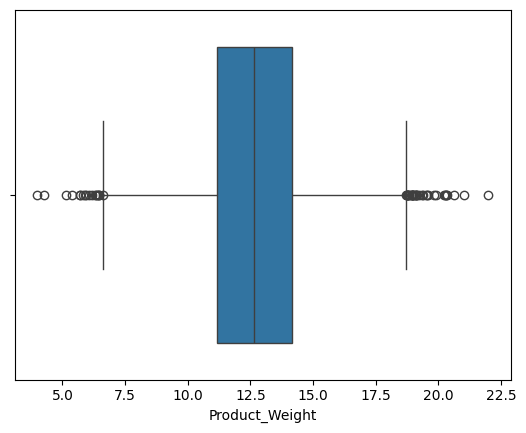

In [29]:
sns.boxplot(data = df, x= 'Product_Weight')

A lot of outliers on both side. Q2 is somewhere between Q1 and Q3 - almost in the middle. Distribution seems symmetric. Mean and median are probably also very close.

<Axes: xlabel='Product_Weight', ylabel='Count'>

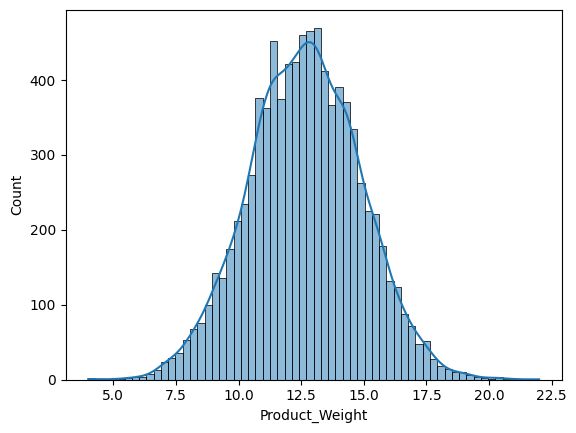

In [30]:
sns.histplot(data = df, x= 'Product_Weight', kde = True)

You can see that the form in the above is very similar to Gaussian/Normal distribution which is good.

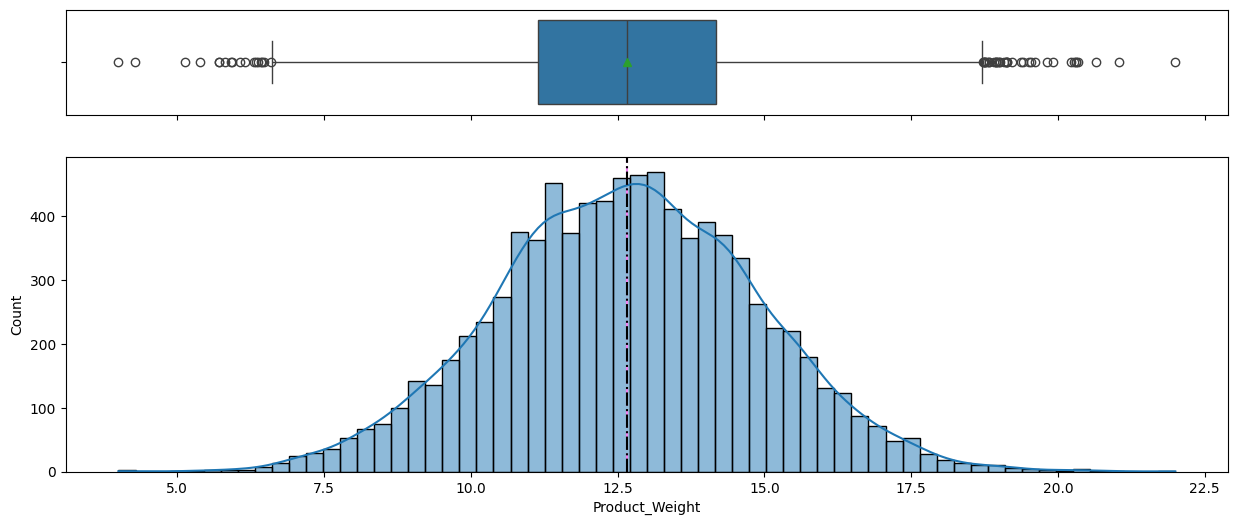

In [31]:
fig, ax = plt.subplots(2,1, figsize = (15,6), gridspec_kw = {'height_ratios': (1,3)}, sharex=True)

sns.boxplot(data = df, x = 'Product_Weight', showmeans = True, ax = ax[0])
sns.histplot(data = df, x = 'Product_Weight', ax = ax[1], kde = True)

# let's add mean and median lines to the histogram
ax[1].axvline(df['Product_Weight'].mean(), linestyle = '--', color = 'violet')
ax[1].axvline(df['Product_Weight'].median(), linestyle = '-.', color = 'black')

In [32]:
# copying a function below that does all of the above for us.

def plot_distribution(df, column):
    fig, ax = plt.subplots(2, 1, figsize=(15, 6),
                           gridspec_kw={'height_ratios': (1, 3)},
                           sharex=True)

    # Boxplot (top)
    sns.boxplot(data=df, x=column, showmeans=True, ax=ax[0])

    # Histogram with KDE (bottom)
    sns.histplot(data=df, x=column, ax=ax[1], kde=True)

    # Add mean and median lines
    mean_val = df[column].mean()
    median_val = df[column].median()
    ax[1].axvline(mean_val, linestyle='--', color='violet', label=f'Mean: {mean_val:.2f}')
    ax[1].axvline(median_val, linestyle='-.', color='black', label=f'Median: {median_val:.2f}')

    # Add legend to histogram
    ax[1].legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

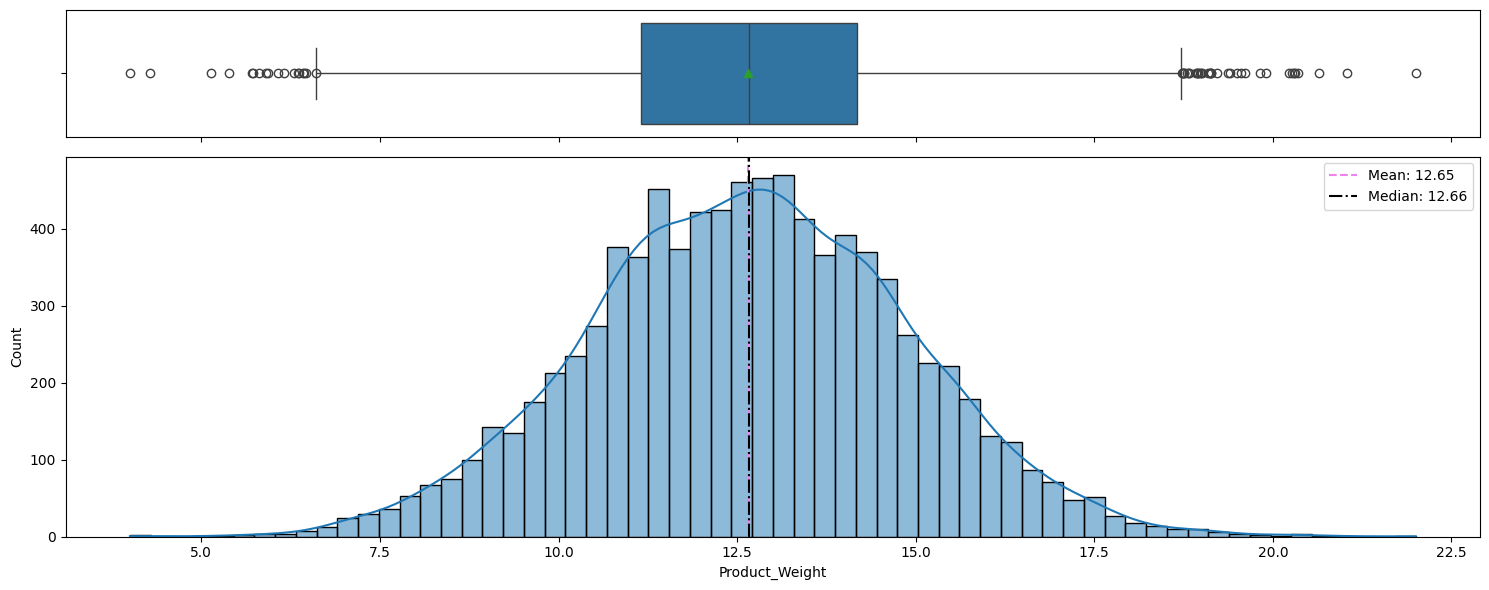

In [33]:
plot_distribution(df, 'Product_Weight')

Summary understanding: The distribution of Product Weight is close to normal. average is around 12.5. there are a lot of outliers on both sides (above 3x standard deviation from the median value).

Now let's look at the rest of the dataframe.

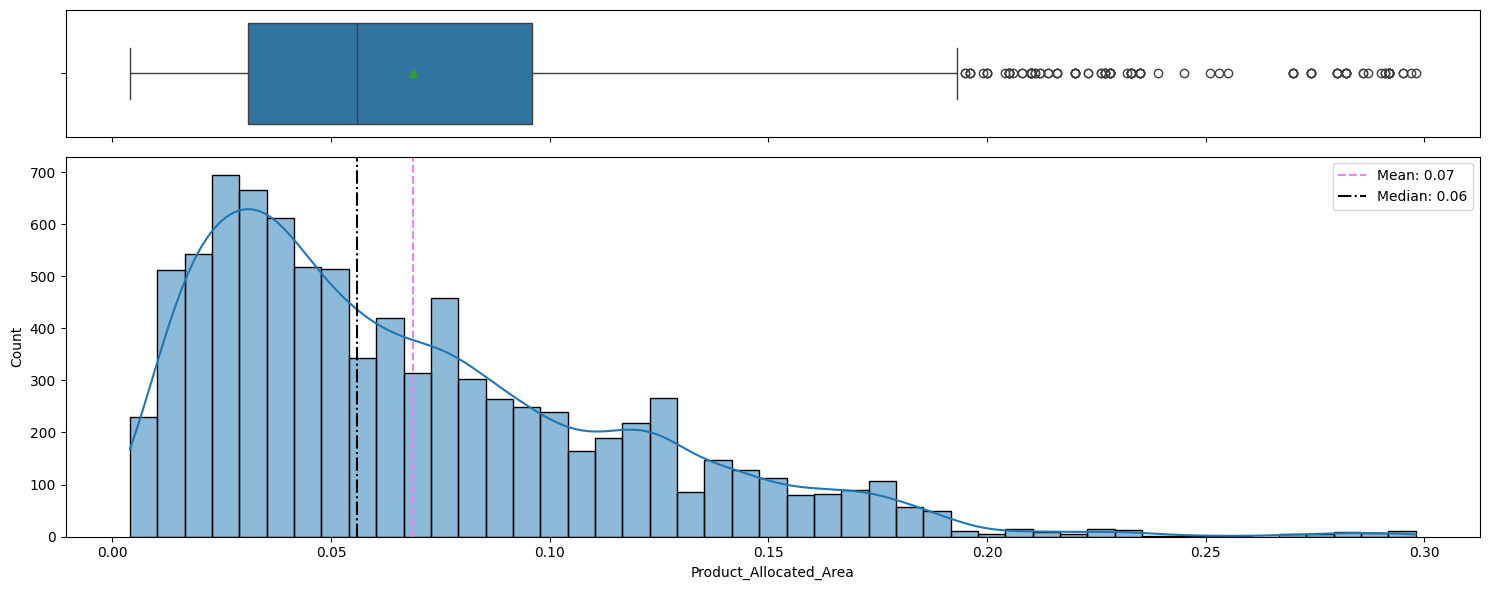

In [34]:
plot_distribution(df, 'Product_Allocated_Area')

Product Allocated Area: A lot of outliers on the right side, so the distribution is right skewed significantly. It's not really that close to a normal distribution. Mean value is higher than the median which makes sense.


*Reflections:*

*   When data is right skewed.. mean > median > mode.
*   When data is left skewed.. mean < median < mode.

*   Mode is associated with the peak of the distribution.


<Axes: xlabel='Product_Allocated_Area', ylabel='Count'>

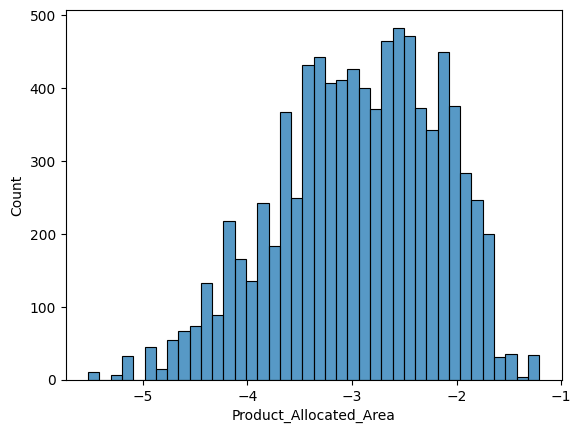

In [35]:
# let's try transforming the above using a log transformation

sns.histplot(np.log(df['Product_Allocated_Area']))

Now it looks a bit more like a normal distribution to us.

<Axes: xlabel='Product_Allocated_Area', ylabel='Count'>

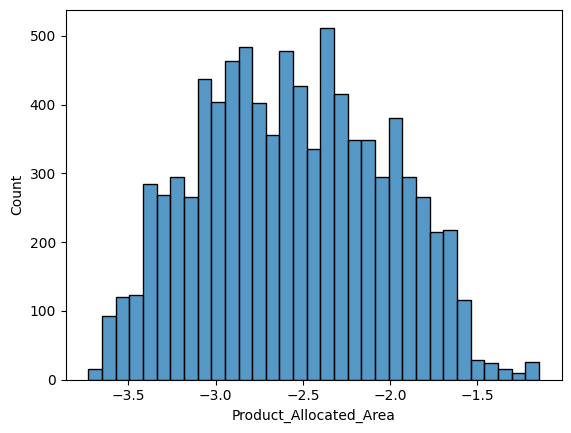

In [36]:
# We can center it more by adding a small value.
sns.histplot(np.log(df['Product_Allocated_Area'] + 0.02))

Now this looks more like a normal distribution. Perhaps not exactly normal but much better than the prior distribution we had. This type of transformation which changes the distribution of the Product Allocated Area column which is not normally distributed can be applied to the original column to get better linear regression outcomes.

We're not going to apply it now. We're going to go with whatever distribution we have. But it's an option that we could use to try and see if the model performance improves with this transformation.

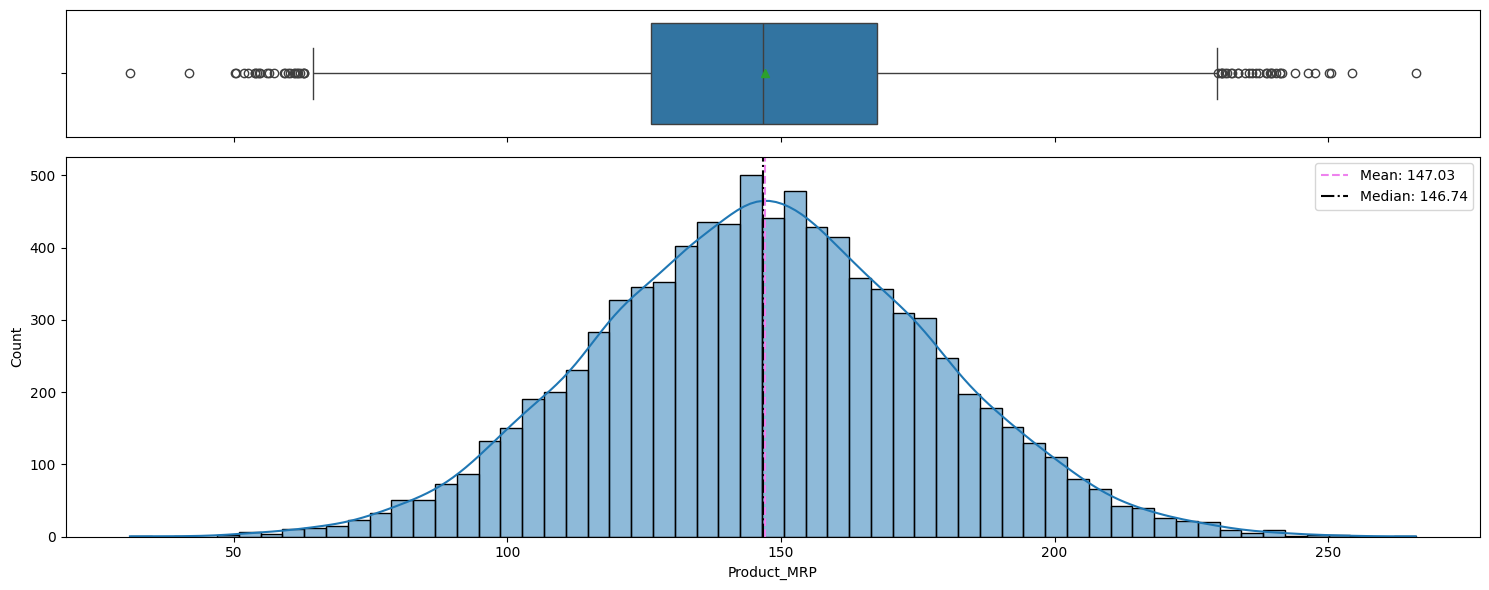

In [37]:
plot_distribution(df, 'Product_MRP')

A lot of outliers on both sides in Maximum Retail Price of each product. This metric is very normally distributed.

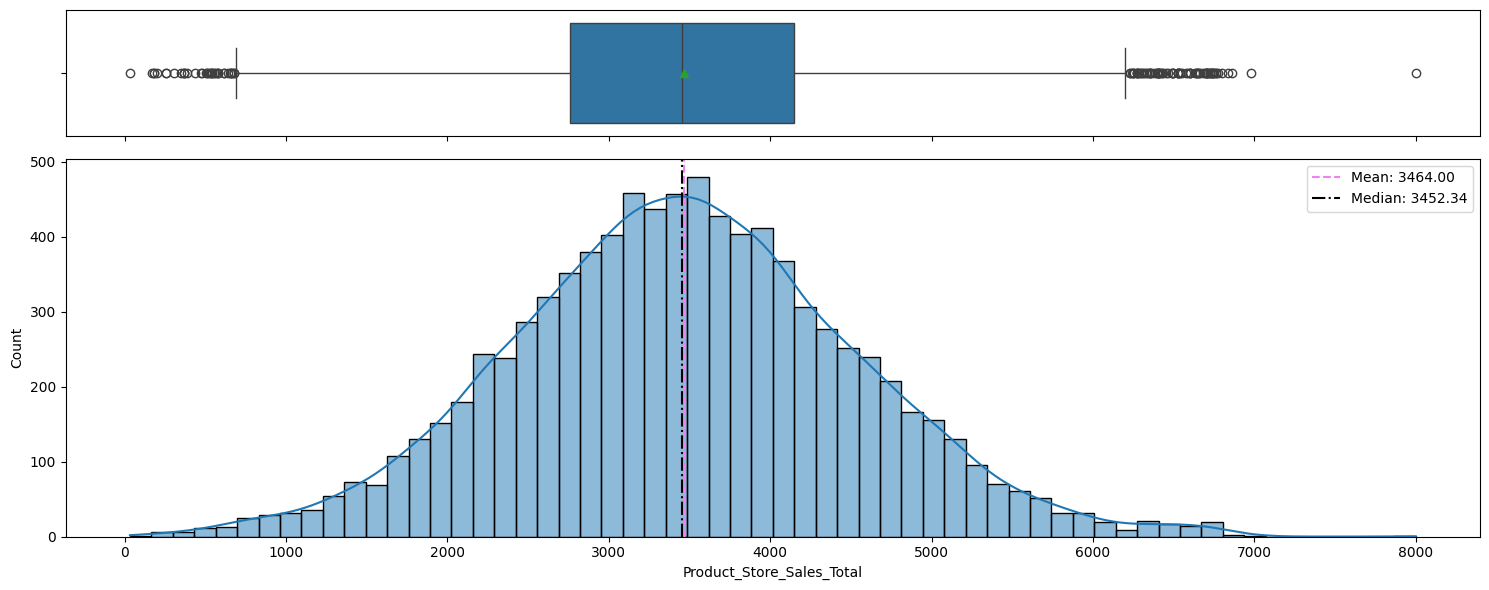

In [38]:
plot_distribution(df, 'Product_Store_Sales_Total')

The target value, the one we're trying to predict/the dependent variable: Product_Store_Sales_Total is normally distributed. There's one outlier that's really far off, but it's just 1 and doesn't impact the total distribution.

In [39]:
df['Store_Establishment_Year'].value_counts()

,count
Store_Establishment_Year,
2009,4676
1987,1586
1999,1349
1998,1152


Store Establishment Year is is more like a categorical variable. There's only 4 of them.

The rest of the features are categorical features, so we can look at them via countplots and such.

# ** Univariate Analysis - Categorical Features**

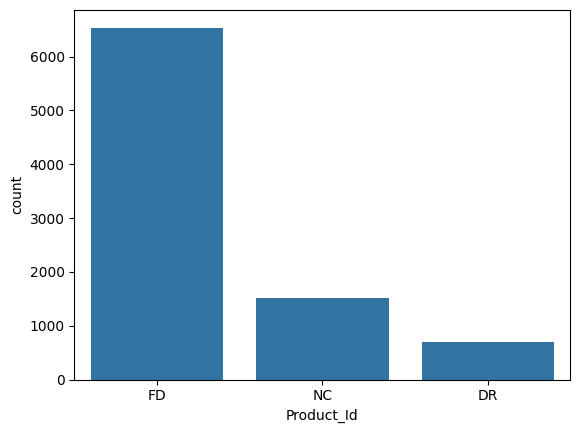

In [40]:
ax = sns.countplot(data = df, x = 'Product_Id')

In [41]:
# function to produce annotated bar plots

def annotate_bars(df, column, mode='count'):
    """
    Annotate sns.countplot bars with either count or percentage.

    Parameters:
    - df: pandas DataFrame
    - column: column name to count
    - mode: 'count' (default) or 'percent'
    """
    num_categories = df[column].nunique()
    fig_width = max(6, num_categories * 0.6)  # adjust width based on number of bars

    plt.figure(figsize=(fig_width, 6))
    ax = sns.countplot(data=df, x=column, palette='tab10')  # colorful palette
    total = len(df)

    for p in ax.patches:
        height = p.get_height()
        label = f'{100 * height / total:.1f}%' if mode == 'percent' else f'{int(height)}'
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45, ha='right')  # optional: rotate x labels for readability
    plt.tight_layout()
    plt.show()

<ipython-input-41-1550821002>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='tab10')  # colorful palette


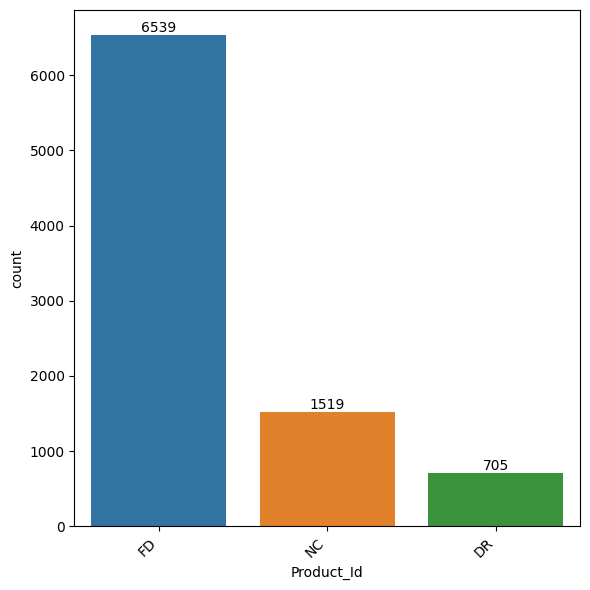

In [42]:
annotate_bars(df, 'Product_Id', mode='count')

<ipython-input-41-1550821002>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='tab10')  # colorful palette


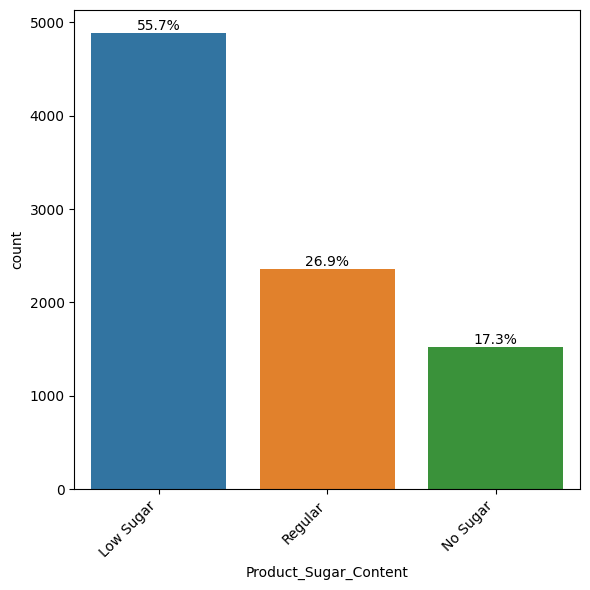

In [43]:
annotate_bars(df, 'Product_Sugar_Content', mode = 'percent')

<ipython-input-41-1550821002>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='tab10')  # colorful palette


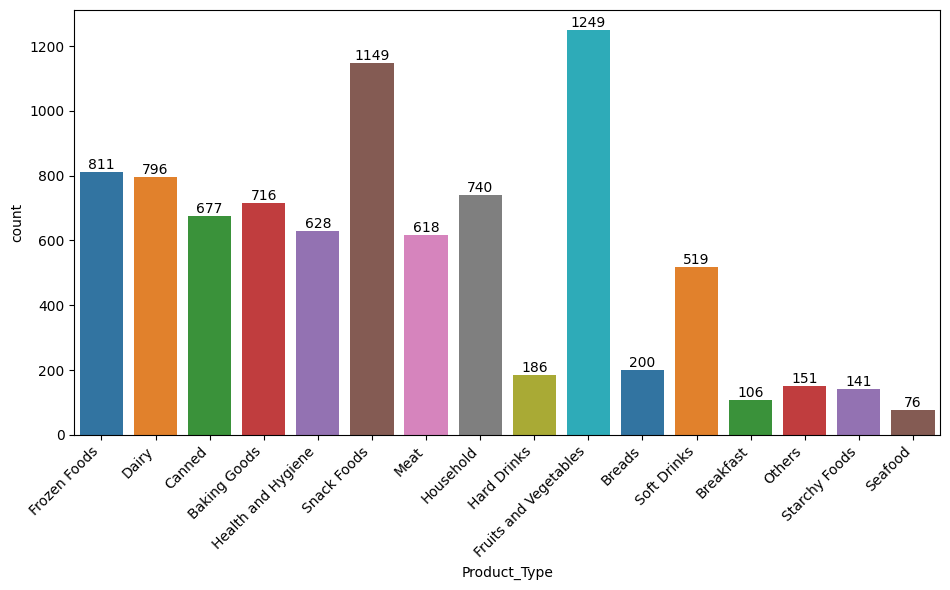

In [44]:
annotate_bars(df, 'Product_Type', mode = 'count')

Top 6 (37%) of categories make up 60% of total categories. There are 16 categories.

<ipython-input-41-1550821002>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='tab10')  # colorful palette


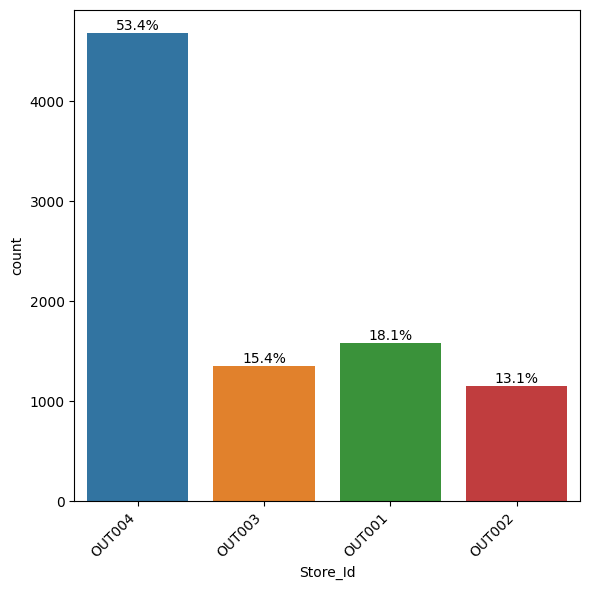

In [45]:
annotate_bars(df, 'Store_Id', mode = 'percent')

50% are in the OUT004 store, rest are kind of similarly distributed.

<ipython-input-41-1550821002>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='tab10')  # colorful palette


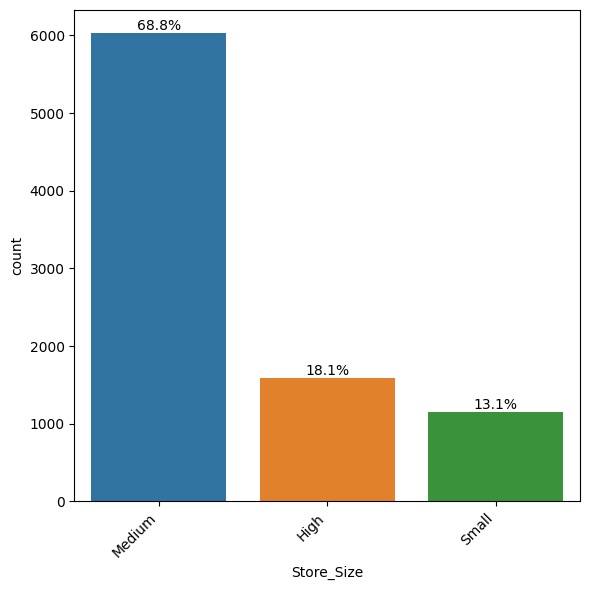

In [46]:
annotate_bars(df, 'Store_Size', mode = 'percent')

Most stores (~70%) are medium sized.

<ipython-input-41-1550821002>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='tab10')  # colorful palette


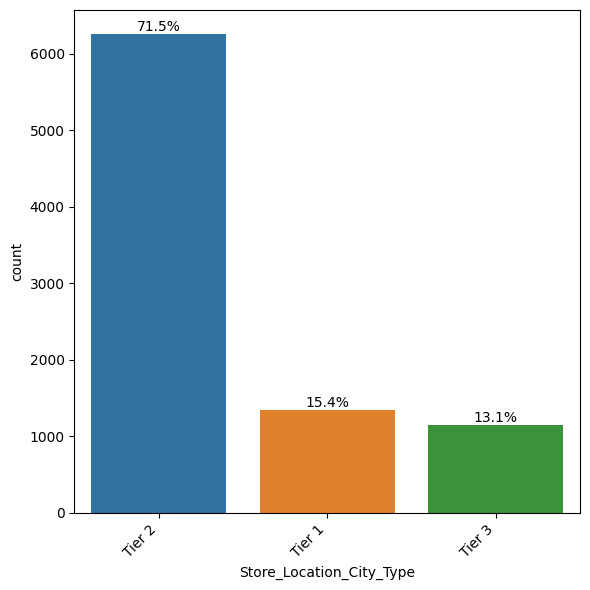

In [47]:
annotate_bars(df, 'Store_Location_City_Type', mode = 'percent')

Most stores (~70%) are tier 2.

<ipython-input-41-1550821002>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='tab10')  # colorful palette


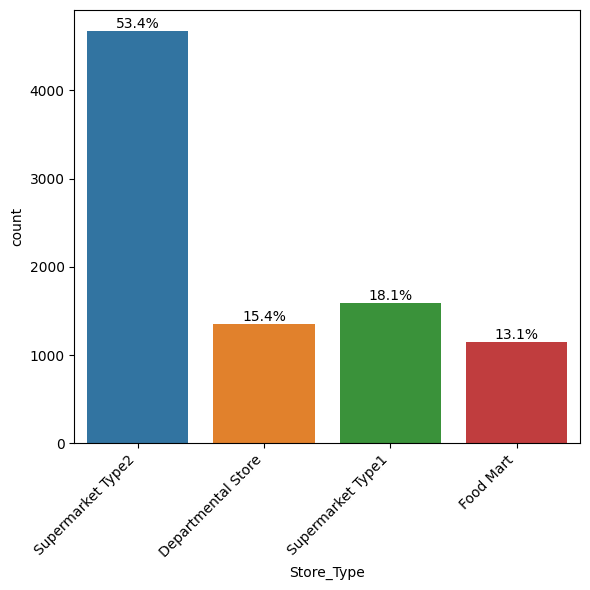

In [48]:
annotate_bars(df, 'Store_Type', mode = 'percent')

Most (53%) are supermarket type 2, rest are in the teens 18%/15%/13%.

# ** Bivariate Analysis - Numerical Variables **

Now we're going to perform bivariate analysis. Seeing effect of one variable on another. One of the most important variables in this dataset is the target variable (Product Store Sales Total). The one we're trying to predict.

Before developing a machine learning algorithm (in this case a linear regression model). We need to estimate whether we can have a model that can perform this prediction well enough by checking the correlation between independent features and the dependent one. This is why the bivariate analysis is useful.

Let's calculate the correlation between all the numerical features.

In [49]:
# we can use seaborns heatmap to plot the correlation of the numerical variable values.

## df.corr()

The above results in an error because the df.corr() method seems to be trying to convert the product_id (FD, NC, DR) that we sliced earlier into a number. So let's modify how we're calling the df.corr method.

In [50]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [51]:
# there was an error with the product ID column (python was trying to convert it to a number and failed).

# Select only numerical columns for correlation calculation.
df_numerical = df.select_dtypes(include=np.number)

# Calculate and display the correlation matrix.
df_numerical.corr()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
Product_Weight,1.000000,0.014754,0.532716,-0.161907,0.737955
Product_Allocated_Area,0.014754,1.000000,-0.009508,0.004467,-0.000933
Product_MRP,0.532716,-0.009508,1.000000,-0.189357,0.787989
Store_Establishment_Year,-0.161907,0.004467,-0.189357,1.000000,-0.185027
Product_Store_Sales_Total,0.737955,-0.000933,0.787989,-0.185027,1.000000


<Axes: >

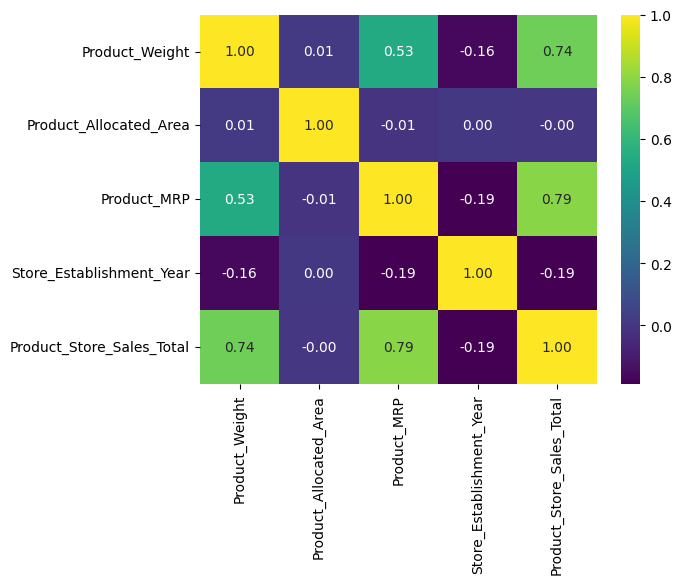

In [52]:
# now let's plot it on a heatmap

sns.heatmap(df_numerical.corr(), annot = True, fmt = '0.2f', cmap = 'viridis')

Correlation between product sales and product MRP is high (0.79). Product weight and product sales are also very correlated (0.74).

The store age (establishment year) has a slight negative correlation with product sales.

Product MRP is somewhat correlated with product weight (0.5). There's some negative correlation between product weight and store age (establishment year).




Let's explore how the different independent features are correlated with the dependent feature we're trying to predict.

In [53]:
# we're going to explore to what extent store sales are correlated with product ID.

df_rev = df.groupby(['Product_Id'], as_index = False)['Product_Store_Sales_Total'].sum()

<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

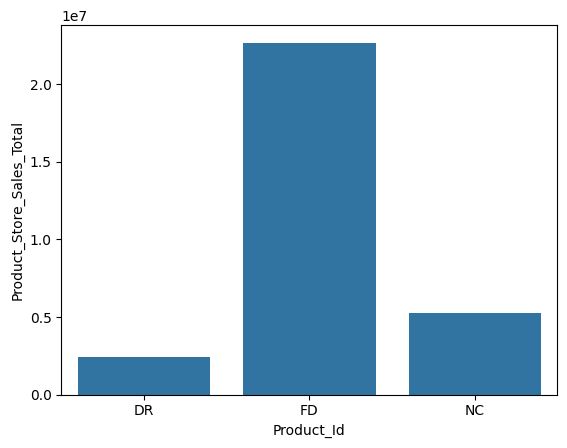

In [54]:
sns.barplot(data = df_rev, x = 'Product_Id', y = 'Product_Store_Sales_Total')

A large portion of revenue comes from food. And NC (non consumables) is almost 2x the drink sales amt.

<ipython-input-55-1985323372>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Product_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

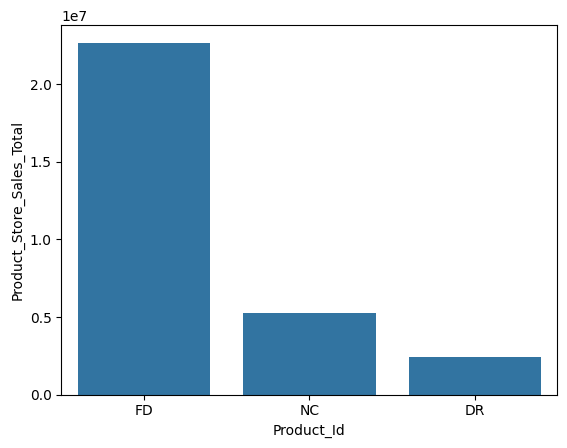

In [55]:
# there's actually an easier way to plot this.
sns.barplot(data = df, x = 'Product_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)

Didn't have to craete df_rev as a separate dataframe to run this analysis. sns.barplot takes care of all of that.

<ipython-input-56-2472486667>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

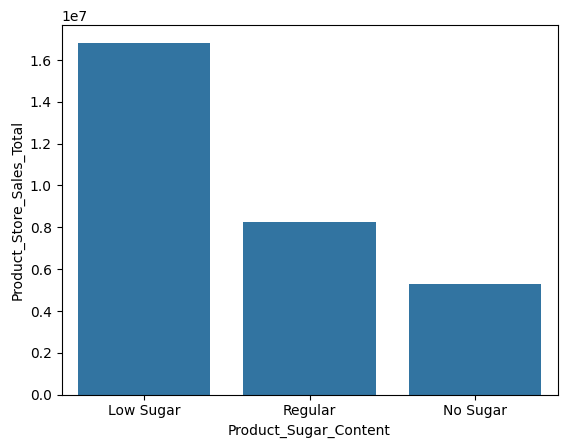

In [56]:
sns.barplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)

In [57]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


<ipython-input-58-3791496187>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

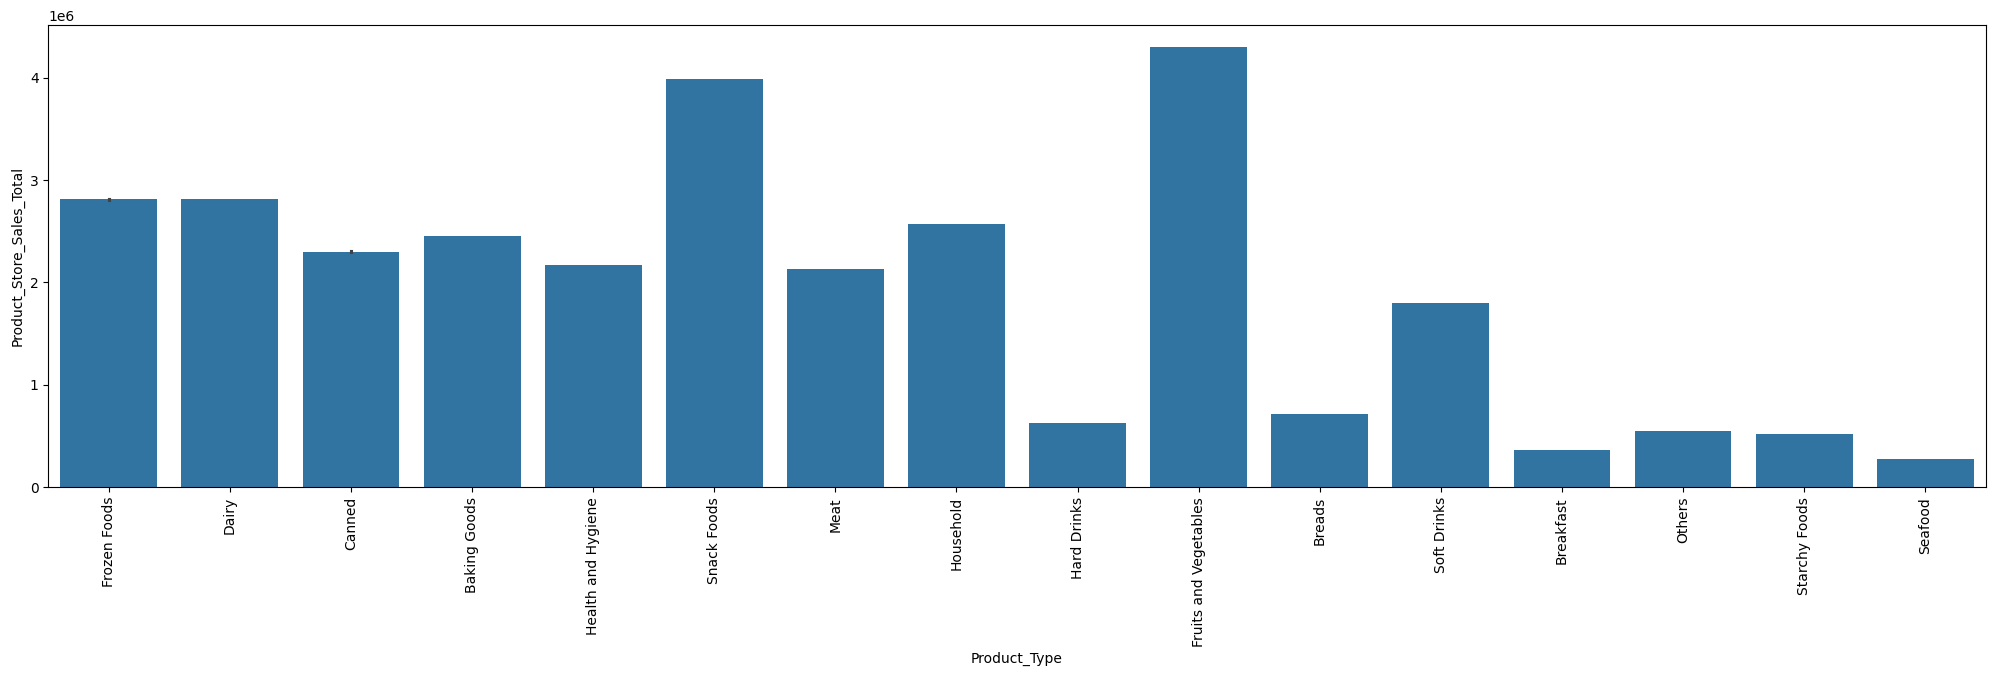

In [58]:
plt.figure(figsize = (25,6))
sns.barplot(data = df, x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

Fruits and veggies, snacks, frozen foods, and dairy contribute the most to product revenues. Lowest ones are seafoods, breakfast, breads etc.

<ipython-input-59-3229140806>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Store_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3],
 [Text(0, 0, 'OUT004'),
  Text(1, 0, 'OUT003'),
  Text(2, 0, 'OUT001'),
  Text(3, 0, 'OUT002')])

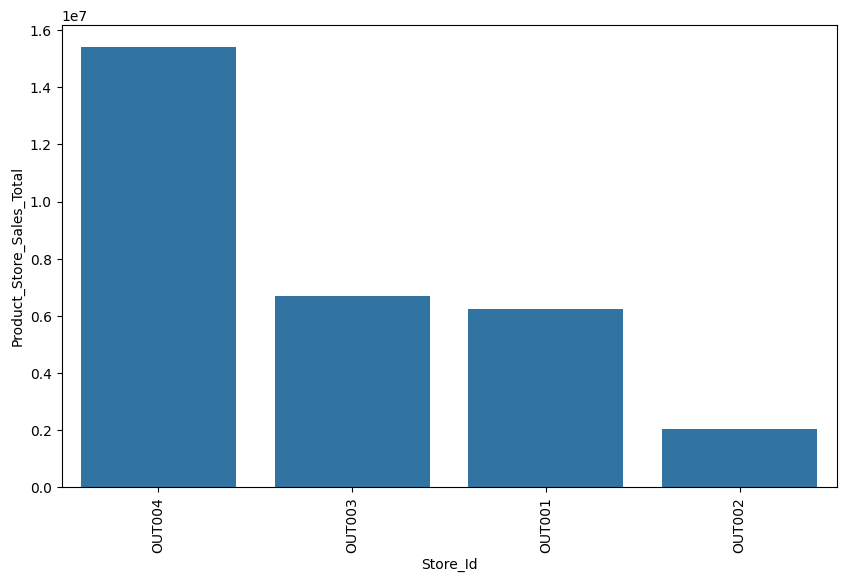

In [59]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Store_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

Biggest revenue driver is store OUT004.

<ipython-input-60-2555272565>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Store_Size', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2], [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

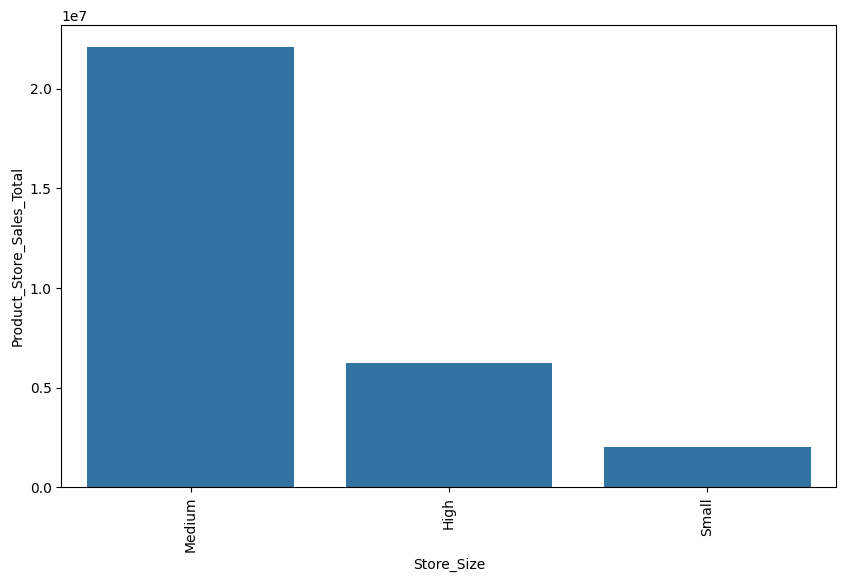

In [60]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Store_Size', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

Medium size stores contribute the most to revenues.

<ipython-input-61-887873844>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Store_Location_City_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2], [Text(0, 0, 'Tier 2'), Text(1, 0, 'Tier 1'), Text(2, 0, 'Tier 3')])

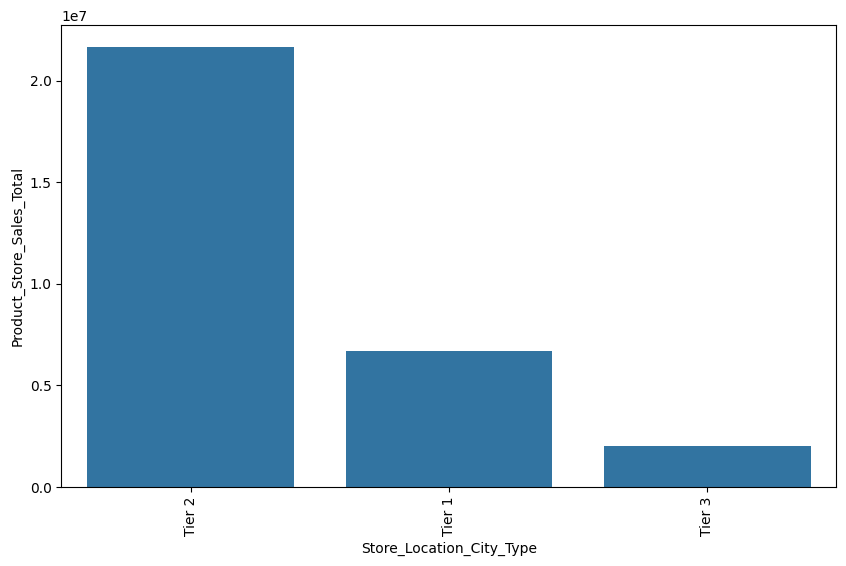

In [61]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Store_Location_City_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

Tier 2 stores are the biggest driver of product sales.

<ipython-input-62-3765061704>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Store_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type2'),
  Text(1, 0, 'Departmental Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Food Mart')])

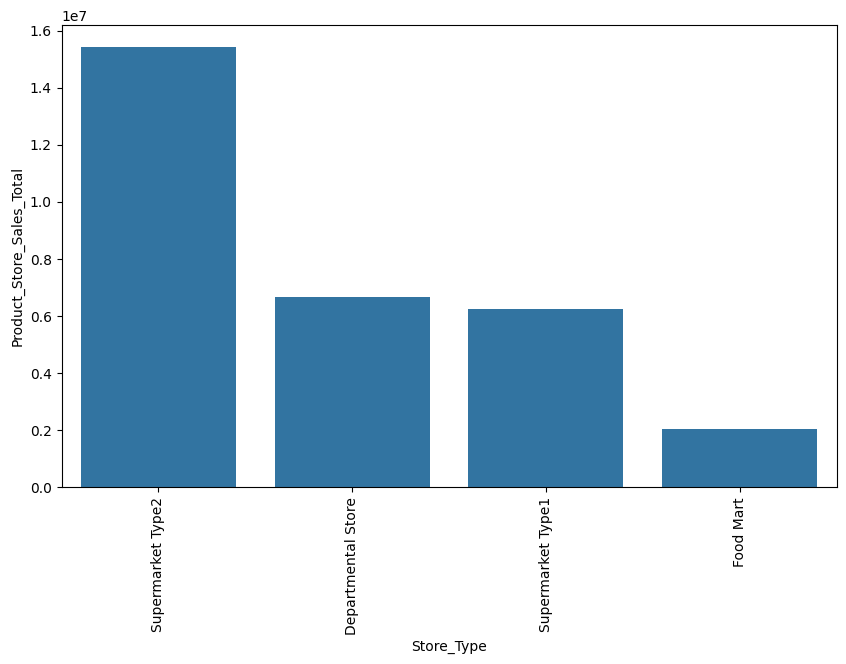

In [62]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Store_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

This tells us supermarket type 2 provides most of the revenue. Food Marts - not a lot.

# ** Bivariate Analysis - Categorical Variables **

So far we've looked at the correlation/split of the numerical and categorical variables with respect to Product Store Sales.

We now want to dive deeper into the distribution of the Product Sales with respect to categorical features.

 For example, let's see the impact of the product sugar content on the total sales in a distribution format. We have a lot of products with high, medium and low sugar content.

<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

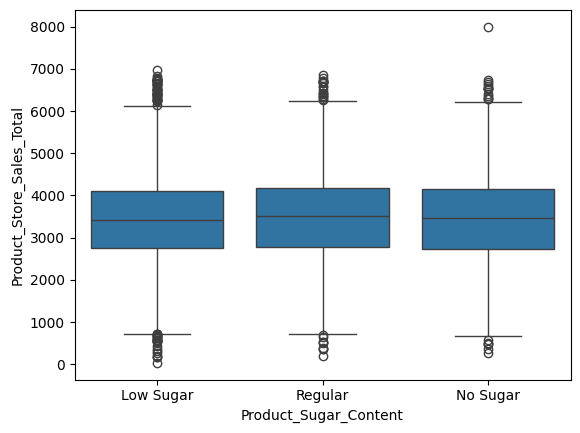

In [63]:
sns.boxplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total')

The effect of the sugar content on the distribution of product store sales is almost negligible. They all almost have the same distribution. But obviously a lot of revenue coming from low sugar as seen in prior anlyses, and smalles quantum coming from no sugar. So although the distribution (prices) associated with those products are the same - the total sales contirbution is different.

Now let's look at the store size.

<Axes: xlabel='Store_Size', ylabel='Product_Store_Sales_Total'>

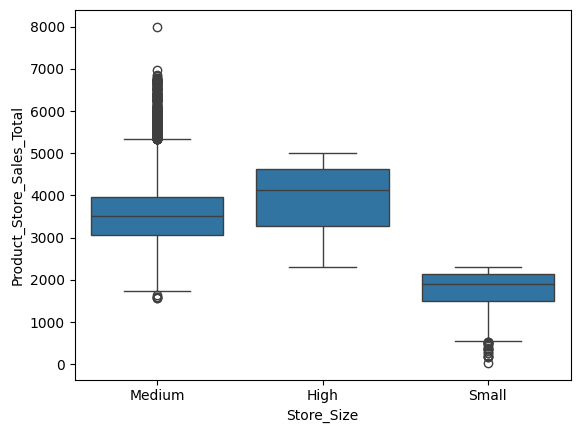

In [64]:
sns.boxplot(data = df, x = 'Store_Size', y = 'Product_Store_Sales_Total')

For the high store size, the median price of the products are higher. Could be that prices of similar products are higher in the big stores, vs medium and small.

<Axes: xlabel='Store_Id', ylabel='Product_Store_Sales_Total'>

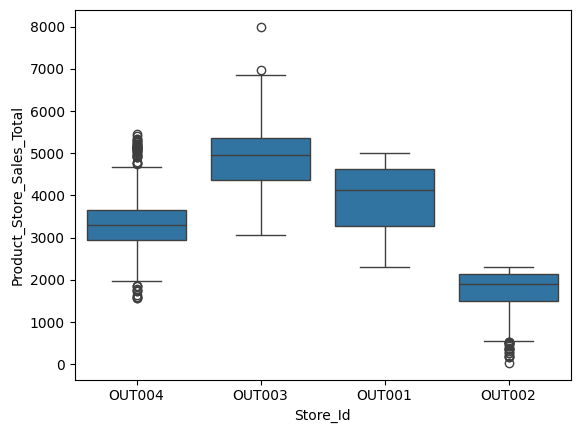

In [65]:
sns.boxplot(data = df, x = 'Store_Id', y = 'Product_Store_Sales_Total')

Most of the revenue was coming from OUT004, but the prices are cheaper than stores 003 and 001. Maybe prices at 002 are lowest for similar products compared to all other stores.

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type2'),
  Text(1, 0, 'Departmental Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Food Mart')])

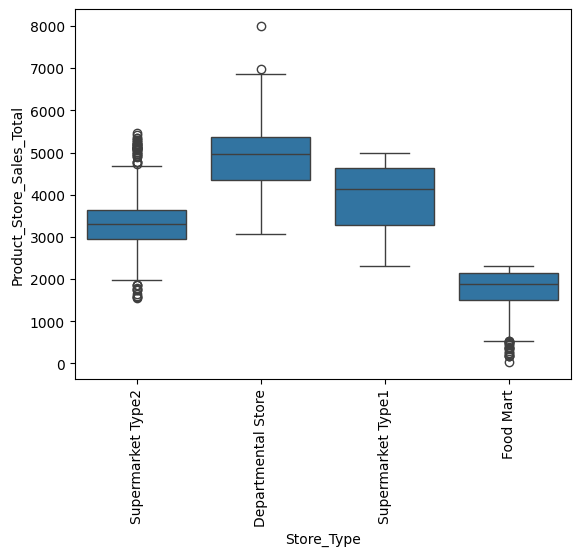

In [66]:
sns.boxplot(data = df, x = 'Store_Type', y = 'Product_Store_Sales_Total')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

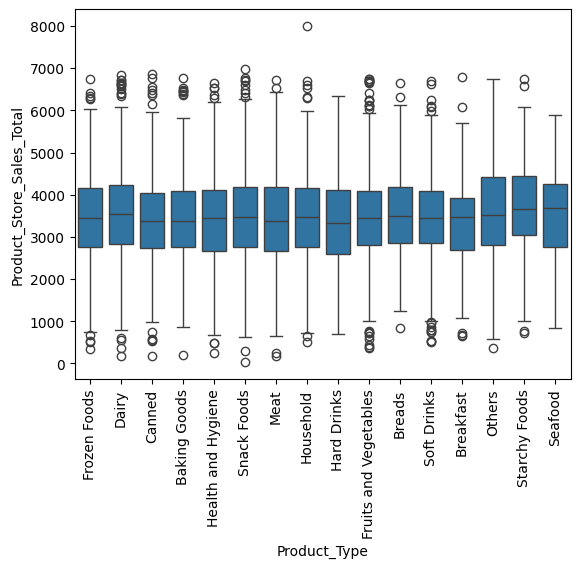

In [67]:
sns.boxplot(data = df, x = 'Product_Type', y = 'Product_Store_Sales_Total')
plt.xticks(rotation = 90)

The distribution of prices across products types aren't that different. Many of them almost have the same median. That's a little surprising.

Now we're going to dive into store analysis.

In [68]:
df['Store_Id'].value_counts()

,count
Store_Id,
OUT004,4676
OUT001,1586
OUT003,1349
OUT002,1152


In [69]:
sales_by_store = df.groupby('Store_Id')['Product_Store_Sales_Total'].sum().reset_index()
sales_by_store['Percentage'] = 100 * sales_by_store['Product_Store_Sales_Total'] / sales_by_store['Product_Store_Sales_Total'].sum()

sales_by_store

,Store_Id,Product_Store_Sales_Total,Percentage
0,OUT001,6223113.18,20.501071
1,OUT002,2030909.72,6.690514
2,OUT003,6673457.57,21.984660
3,OUT004,15427583.43,50.823755


In [70]:
df['Product_Store_Sales_Total'].sum()

np.float64(30355063.9)

<ipython-input-71-2390176943>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] == 'OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Canned'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Soft Drinks'),
  Text(4, 0, 'Meat'),
  Text(5, 0, 'Breakfast'),
  Text(6, 0, 'Frozen Foods'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Dairy'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Starchy Foods'),
  Text(11, 0, 'Health and Hygiene'),
  Text(12, 0, 'Household'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Breads')])

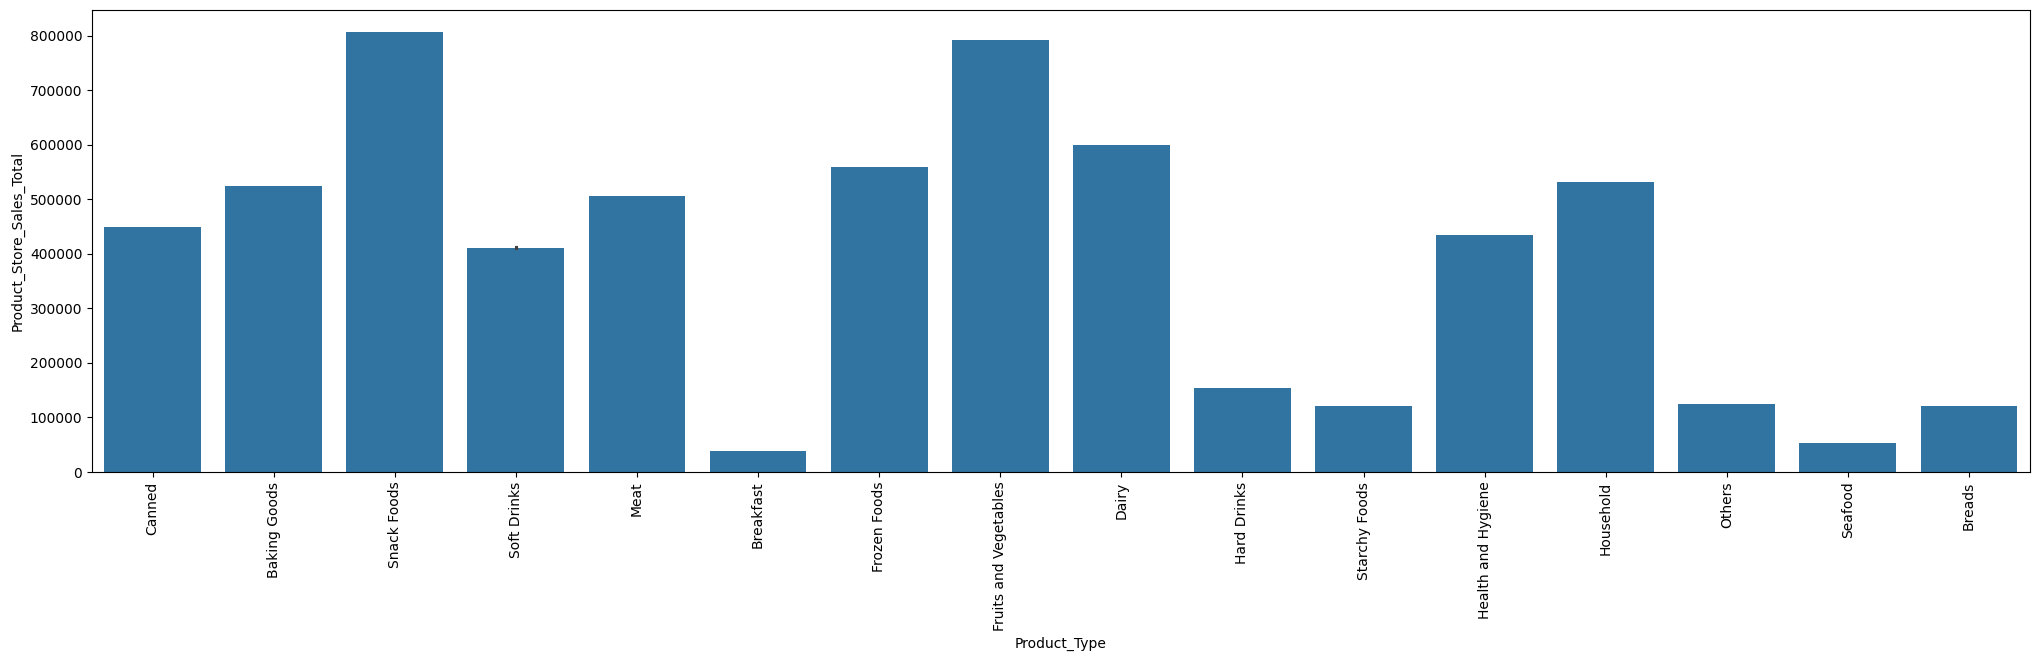

In [71]:
plt.figure(figsize = (25,6))
sns.barplot(data = df[df['Store_Id'] == 'OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

This is distribution of the data for store OUT001. The fruits and veggies and snack foods are highest buckets.

<ipython-input-72-1735881825>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] == 'OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Health and Hygiene'),
  Text(3, 0, 'Hard Drinks'),
  Text(4, 0, 'Fruits and Vegetables'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Breads'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Dairy'),
  Text(10, 0, 'Breakfast'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Meat'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

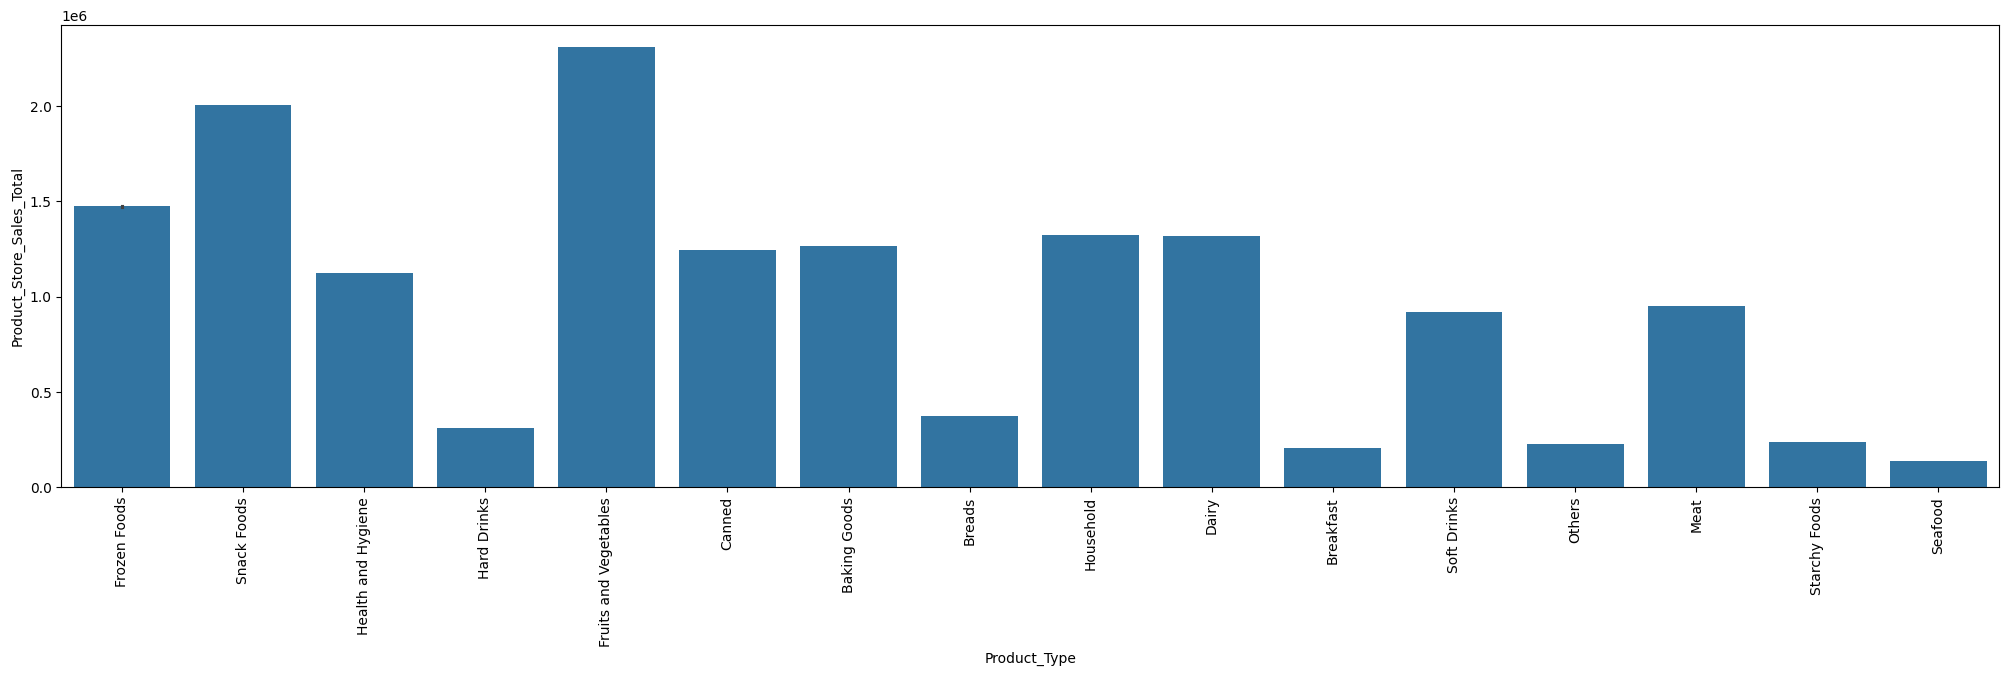

In [72]:
plt.figure(figsize = (25,6))
sns.barplot(data = df[df['Store_Id'] == 'OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

At this point, we've looked at most numerical and categorical data in the dataframe. Familiarized ourselves with types of stores and products, where the revenue is coming from and what is the no sugar content products.

# ** Preparing Our Dataset for Machine Learning Model **

So we know a lot of the revenues come from store 004. But we're not sure if products that exist in store 004 also exist in store 001.

So.. we want to get into the details of product types and store ID.

To assess this, we're going to use pandas crosstab function.

In [73]:
pd.crosstab(df['Store_Id'], df['Product_Type'])

Product_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Store_Id,,,,,,,,,,,,,,,,
OUT001,136,30,10,119,150,142,199,38,114,134,130,31,13,202,106,32
OUT002,96,23,15,88,104,101,168,30,91,100,87,19,10,146,62,12
OUT003,99,34,19,90,145,122,182,23,89,107,106,32,13,186,74,28
OUT004,385,113,62,380,397,446,700,95,334,399,295,69,40,615,277,69


<Axes: xlabel='Product_Type', ylabel='Store_Id'>

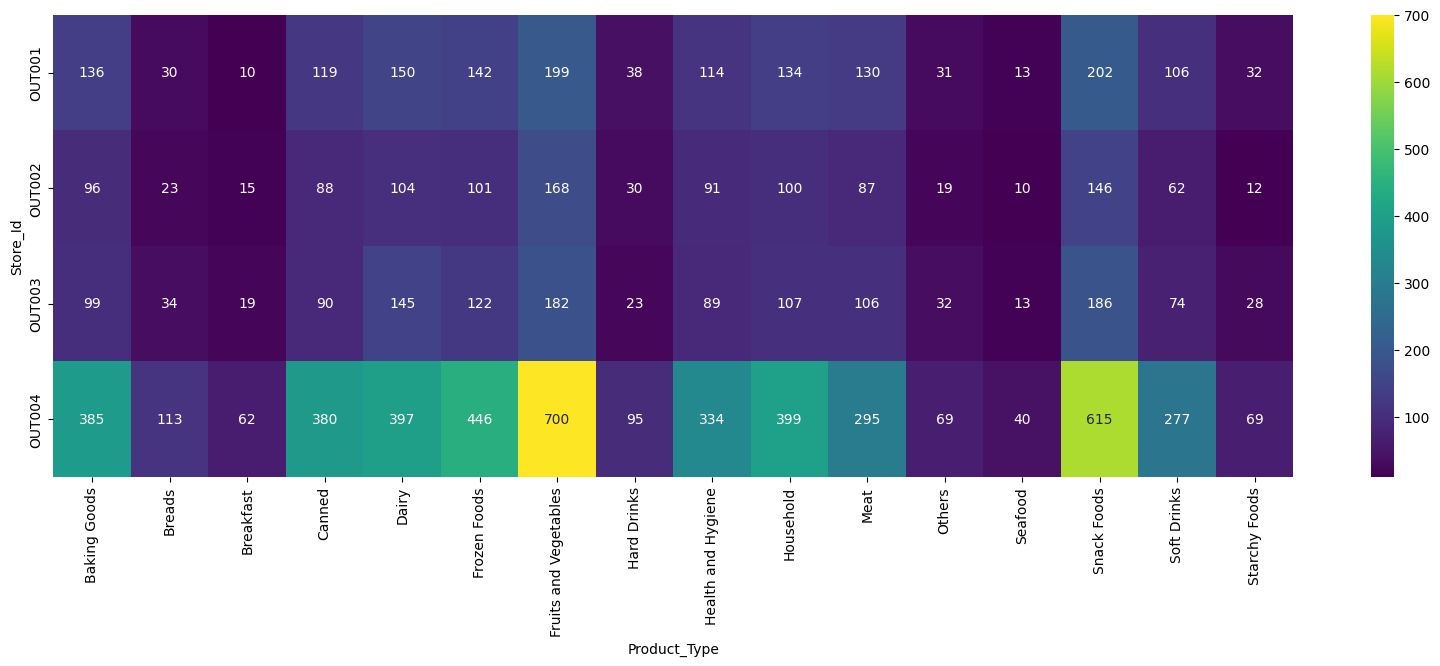

In [74]:
plt.figure(figsize = (20,6))
sns.heatmap(pd.crosstab(df['Store_Id'], df['Product_Type']), annot = True, cmap = 'viridis', fmt = 'g')

Snacks and fruits and vegetables sell at  dispraportionately higher amounts at store 004. Soft drinks are also relatively high.

Now let's do the same analysis, but with Product Sugar Content and Product Type to understand which products don't have sugar content.

<Axes: xlabel='Product_Type', ylabel='Product_Sugar_Content'>

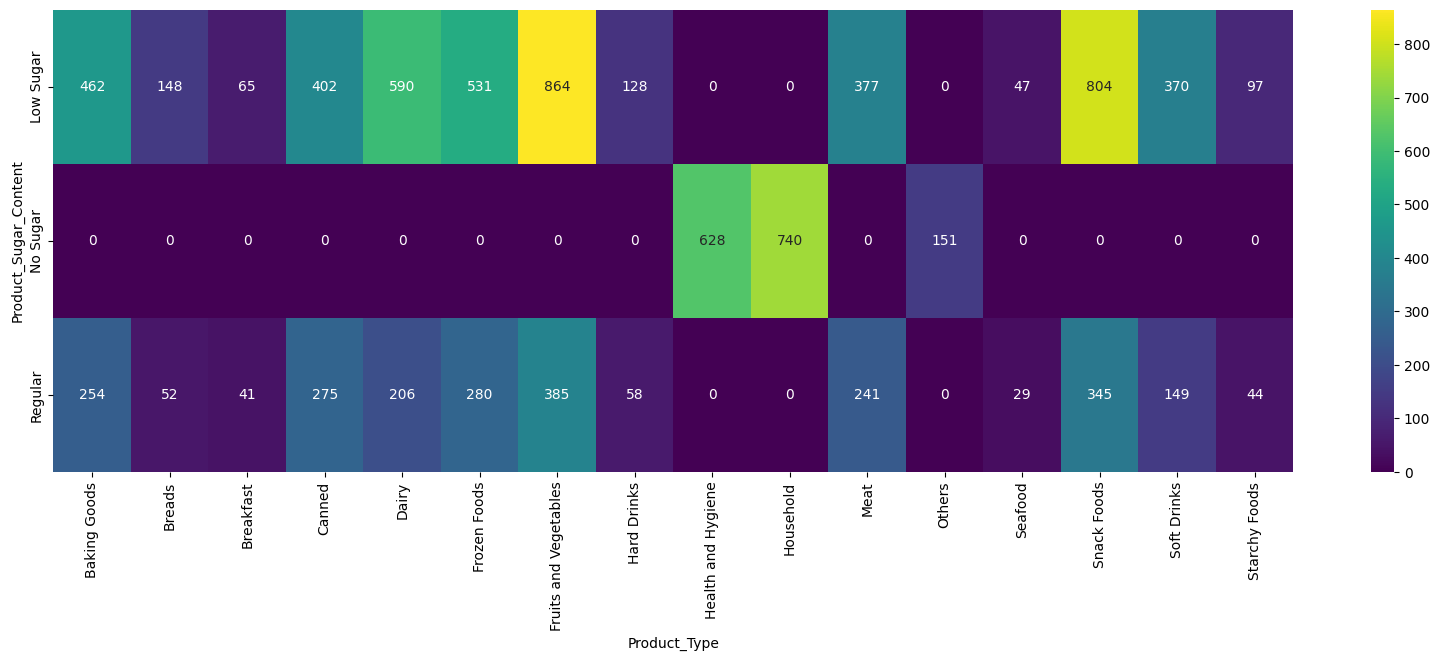

In [75]:
plt.figure(figsize = (20,6))
sns.heatmap(pd.crosstab(df['Product_Sugar_Content'], df['Product_Type']), annot = True, cmap = 'viridis', fmt = 'g')

Only health and hygene, household and 'other' products don't have sugar.

We can use pandas crosstab to find the counts associated with 2 categorical features across our dataframe. The output is a matrix.

Whenever the output is a matrix, we can actually use a heatmap to visualize it.

Now we're going to use our machine learning model to predict a continuous value out of this data frame. That value is Product Store Sales Total.

Before developing the model, we still need to develop some feature engineering. 1) Check the outliers in numerical features and 2) perform split in the dataset so we can use train portion of the dataset for training and test portion of the dataset for testing and validating performance of the training model.



Let's first quickly look at the features.

Product ID - we removed the numerical part and kept FD, NC, and DR.

Product type - there's so many categories. we can probably reduce the number of features.

Establishment year - probably better to change that to store age. That has a lot more meaning. And probably easier for the model to use that data.


In [76]:
df['Store_Establishment_Year'] = 2025 - df['Store_Establishment_Year']

In [77]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,16,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,26,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,38,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,38,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,27,Small,Tier 3,Food Mart,2279.36


In [78]:
df.rename(columns={'Store_Establishment_Year': 'Store_Age'}, inplace=True)

In [79]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Age,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,16,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,26,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,38,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,38,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,27,Small,Tier 3,Food Mart,2279.36


In [80]:
df['Product_Type'].value_counts().index.to_list()

['Fruits and Vegetables',
 'Snack Foods',
 'Frozen Foods',
 'Dairy',
 'Household',
 'Baking Goods',
 'Canned',
 'Health and Hygiene',
 'Meat',
 'Soft Drinks',
 'Breads',
 'Hard Drinks',
 'Others',
 'Starchy Foods',
 'Breakfast',
 'Seafood']

Okay so in terms of reducing these categories. Easily we can see that some of these products are perishable and others aren't.

We could also just use the product ID categories (FD, NC, DR).

In [81]:
Perishables = ['Fruits and Vegetables', 'Dairy', 'Meat', 'Breads', 'Breakfast', 'Seafood' ]

# we're going to change product type to perishable and non perishable using a function and the above list

def label_type(x):
  if x in Perishables:
    return 'Perishable'
  else:
    return 'Non-Perishable'

df['Product_Type'] = df['Product_Type'].apply(label_type)

In [82]:
df['Product_Type'].value_counts()

,count
Product_Type,
Non-Perishable,5718
Perishable,3045


In [83]:
# this shows percentage split of product types
df['Product_Type'].value_counts(1)

,proportion
Product_Type,
Non-Perishable,0.652516
Perishable,0.347484


In [84]:
df.rename(columns={'Product_Type': 'Product_Type_Categories'}, inplace=True)

In [85]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type_Categories,Product_MRP,Store_Id,Store_Age,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Non-Perishable,117.08,OUT004,16,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Perishable,171.43,OUT003,26,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Non-Perishable,162.08,OUT001,38,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Non-Perishable,186.31,OUT001,38,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Non-Perishable,123.67,OUT002,27,Small,Tier 3,Food Mart,2279.36


In [86]:
df.select_dtypes(include = np.number)

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Store_Sales_Total
0,12.66,0.027,117.08,16,2842.40
1,16.54,0.144,171.43,26,4830.02
2,14.28,0.031,162.08,38,4130.16
3,12.10,0.112,186.31,38,4132.18
4,9.57,0.010,123.67,27,2279.36
...,...,...,...,...,...
8758,14.80,0.016,140.53,16,3806.53
8759,14.06,0.142,144.51,16,5020.74
8760,13.48,0.017,88.58,38,2443.42
8761,13.89,0.193,168.44,38,4171.82


In [87]:
num_cols = df.select_dtypes(include = np.number).columns.to_list()

In [88]:
num_cols

['Product_Weight',
 'Product_Allocated_Area',
 'Product_MRP',
 'Store_Age',
 'Product_Store_Sales_Total']

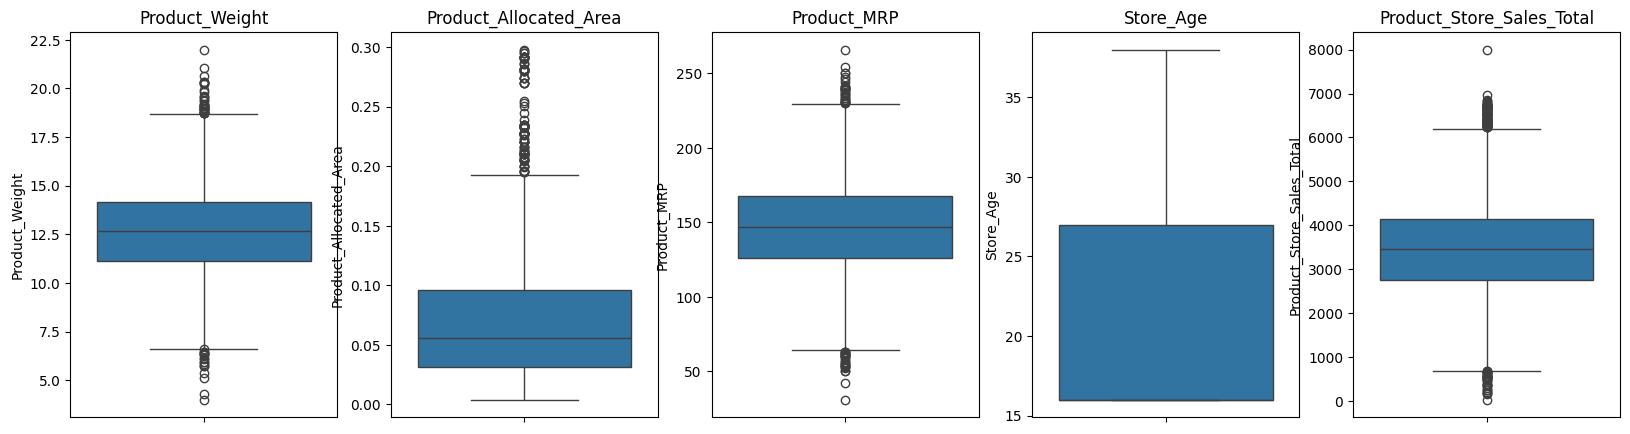

In [89]:
fig, ax = plt.subplots(1,5,figsize = (20,5))

j = 0
for i in num_cols:
  sns.boxplot(df[i], ax = ax[j]).set(title = i)
  j += 1


Product store sales has one far away outlier. but that's the target value so we're not going to really touch that.

The first two charts make sense too. can see how some products can have much larger weight and how some can have a lot of area allocated to them because they are big in size.

Now we're going to divide the data into train and test - so we can use train data for training and test for testing our linear regression models.

In [90]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type_Categories,Product_MRP,Store_Id,Store_Age,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Non-Perishable,117.08,OUT004,16,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Perishable,171.43,OUT003,26,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Non-Perishable,162.08,OUT001,38,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Non-Perishable,186.31,OUT001,38,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Non-Perishable,123.67,OUT002,27,Small,Tier 3,Food Mart,2279.36


Model Building is the process of developing a probabilistic model that best describes the relationship between the dependent and indepedent variables.

Looking at dataframe, we know we have numerical and categorical features. The machine learning model doesn't understand categorical features. So we have to encode them. We're going to use pandas to do this. We could have also decided to use scikit learn and many other packages as well.

In [91]:
df.dtypes.value_counts()

,count
object,7
float64,4
int64,1


In [92]:
df.select_dtypes(include = 'object').columns.to_list()

# these are the feature names of the datatypes that are not numerical (data type = object)

['Product_Id',
 'Product_Sugar_Content',
 'Product_Type_Categories',
 'Store_Id',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type']

In [93]:
# let's perform OHE. One Hot Encoding: technique used to convert categorical data into a numerical format.

df_ohe = pd.get_dummies(df,
                columns = df.select_dtypes(include = 'object').columns.to_list(),
                drop_first=True,
                dtype=int
                )


# drop first explanation: when you have a feature that has 3 categories and drop_first is set to False, then 3 feature columns will be generated. If you set drop_first = True, then you drop the first one. It's redundant and you don't need it.

In [94]:
df_ohe.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Store_Sales_Total,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Type_Categories_Perishable,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2
0,12.66,0.027,117.08,16,2842.40,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1
1,16.54,0.144,171.43,26,4830.02,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0
2,14.28,0.031,162.08,38,4130.16,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,12.10,0.112,186.31,38,4132.18,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,9.57,0.010,123.67,27,2279.36,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0


now we need to define our dependent and indendent features.

In [95]:
x = df_ohe.drop('Product_Store_Sales_Total', axis = 1)
y = df_ohe['Product_Store_Sales_Total']

In [96]:
x.shape

(8763, 19)

In [97]:
y.shape

(8763,)

We're almost ready for model development.

If you want to use statsmodels library not scikit-learn then first thing is if you want to have bias in your linear regression model, you have to add a constant.

Scikit-learn includes the intercept by default.

Statsmodels does not — you have to manually add it using add_constant().

The intercept lets your model predict a baseline value when all input features are zero. Without it, the regression line is forced to pass through the origin, which rarely fits real-world data well. Including the intercept improves model flexibility and accuracy by allowing vertical shifts in the prediction line. Real world example - if you have 0 years of work experience, in most cases, that doesn't mean your salery is 0.

In [98]:
import statsmodels.api as sm

In [99]:
x = sm.add_constant(x)

In [100]:
# now when we look at the x df, we notice it has a "const" feature added. This column will be used to add a bias to the linaer regression model.
x.head()

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Type_Categories_Perishable,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2
0,1.0,12.66,0.027,117.08,16,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1
1,1.0,16.54,0.144,171.43,26,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0
2,1.0,14.28,0.031,162.08,38,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,1.0,12.10,0.112,186.31,38,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.0,9.57,0.010,123.67,27,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# test side: our dataset is pretty small, ~9k rows. We don't want the test size to be too small.

# Randon_state helps with reproducability of our results.
# You should set random_state whenever a function or model uses
# randomness (e.g., data splitting, tree-based models, clustering)
# and you want consistent, reproducible results. This ensures fair comparisons
# across models and makes debugging and collaboration easier.

In [103]:
x_train.shape

(6134, 20)

In [104]:
x_test.shape

(2629, 20)

In [105]:
y_train.shape

(6134,)

In [106]:
y_test.shape

(2629,)

We're almost ready to train our machine learning model (Linear regression). First we need to check for multi co-linearity. Everytime we train a linear regression model, we have to check for co-linearity.

Multi co-linearity - one or more columns can be generated using a linear combination of other columns. So one independent variable is not very indepedent - it's depedent on other features existing in the dataset. Makes the model unstable - cannot have good understanding of important features.

ChatGPT said:
Collinearity (or multicollinearity) happens when two or more input features (independent variables) in a regression model are highly correlated — meaning they carry similar or redundant information.

Why it's a problem:
It makes it hard to interpret the effect of each variable (coefficients become unstable or misleading).

It can lead to overfitting or reduce the reliability of the model’s predictions.

So.. first let's conduct multi-colinearity analysis to make sure that all the features we have are rather indepedent. And then we can use them to develop our model. If there are features that are dependent, we may drop them so that multi-colinearity does not exist.

We're going to use statsmodel library to capture VIF (variance inflation factor) to find out if there is multi-colinearity existing in our feature set or not.

Remember we have numerical features and also encoded categorical features. The variance for the encoded categorical features might be high. We mostly don't pay attention to encoded categorical features that much but for continuous features we want them to be less than 5. Definitely less than 10. but in most cases, you want them to be less than 5.

The VIF value is a value between 0 to infinity. If the value is less than 5 for continuous features, we're good to go. if more than 5, we have to take care of it.

The VIF can be 0. If you have a column where all the values are the same. The VIF would be 0. eg, const feature in our dataset where all the values are 1. VIF for that will probably be 0.

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
x_train.dtypes

,0
const,float64
Product_Weight,float64
Product_Allocated_Area,float64
Product_MRP,float64
Store_Age,int64
Product_Id_FD,int64
Product_Id_NC,int64
Product_Sugar_Content_No Sugar,int64
Product_Sugar_Content_Regular,int64
Product_Type_Categories_Perishable,int64


In [109]:
variance_inflation_factor(x_train, 1)

np.float64(1.790909982480833)

Now, let's create a for loop to run through all the columns. For this, we're going to create a VIF dataframe.

In [110]:
# we're going to create a new dataframe for these results.
VIF_df = pd.DataFrame()

# in one column, we're going to put the names of the columns.
# and in another column, we're going to put the VIF of the columns.

VIF_df['Features'] = x_train.columns
VIF_df['vif'] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]

VIF_df



/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Store_Age,inf
5,Product_Id_FD,2.841545
6,Product_Id_NC,inf
7,Product_Sugar_Content_No Sugar,inf
8,Product_Sugar_Content_Regular,1.086384
9,Product_Type_Categories_Perishable,1.222380


VIF close to 1 is awesome. This means the variable is almost 100% independent of all other features.

Store age = inf is not good. It's a numerical feature with a really high VIF. it means that the storeage column can be exactly re-created using the other columns in the dataset. Since that's the case, we have to drop this continuous value.

There are other columns with inf for VIF. But the rest of all of those are categorical features.

In [111]:
VIF_df

,Features,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Store_Age,inf
5,Product_Id_FD,2.841545
6,Product_Id_NC,inf
7,Product_Sugar_Content_No Sugar,inf
8,Product_Sugar_Content_Regular,1.086384
9,Product_Type_Categories_Perishable,1.222380


In [112]:
x_train.drop(columns=['Store_Age'], axis=0, inplace=True)

# inplace = True modifies the original dataframe.

In [113]:
x_train.shape

(6134, 19)

We need to do the same thing in the test dataset as well.

In [114]:
x_test.drop(columns=['Store_Age'], axis=0, inplace=True)

# inplace = True modifies the original dataframe.

In [115]:
x_test.shape

(2629, 19)

Now let's re-run the VIF analysis and look at those values again.

In [116]:
# we're going to create a new dataframe for these results.
VIF_df = pd.DataFrame()

# in one column, we're going to put the names of the columns.
# and in another column, we're going to put the VIF of the columns.

VIF_df['Features'] = x_train.columns
VIF_df['vif'] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]

VIF_df

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Product_Id_FD,2.841545
5,Product_Id_NC,inf
6,Product_Sugar_Content_No Sugar,inf
7,Product_Sugar_Content_Regular,1.086384
8,Product_Type_Categories_Perishable,1.222380
9,Store_Id_OUT002,inf


# ** Model Building - Linear Regression Machine Learning Model **

Now we're ready to start develop a linear regression model to estimate the total sales based on the given independent features.


Now that our dataset passed the multi-colinearity test. Let's fit the linear regression model.

We're going to use the x_train and also y_train datasets to train our model.

We're going to use statsmodel library. Ordinary least squares is the model that we're using (linear regression model).

Creation of the model is really simple.

In [117]:
# building ordinary least squares / linear regression model.

model = sm.OLS(y_train, x_train).fit()

In [118]:
# when the model is ready, you can check the summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2806.
Date:                       Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                               00:38:48   Log-Likelihood:                -46211.
No. Observations:                       6134   AIC:                         9.244e+04
Df Residuals:                           6123   BIC:                         9.252e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -9.2899     34.214     -0.272      0.786     -76.361      57.781
Product_Weight                       136.6200      3.472     39.348      0.000     129.813     143.426
Product_Allocated_Area                57.1761    119.905      0.477      0.633    -177.879     292.231
Product_MRP                           13.1178      0.262     49.976      0.000      12.603      13.632
Product_Id_FD                        -24.2278     22.464     -1.079      0.281     -68.264      19.809
Product_Id_NC                         11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_No Sugar        11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_Regular         23.1491     13.552      1.708      0.088      -3.418      49.717
Product_Type_Categories_Perishable    26.8072     13.404      2.000      0.046       0.530      53.085
Store_Id_OUT002                     -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Id_OUT003                      331.9870     19.997     16.602      0.000     292.787     371.188
Store_Id_OUT004                     -162.7939      5.244    -31.046      0.000    -173.073    -152.515
Store_Size_Medium                    169.1931     16.695     10.135      0.000     136.466     201.920
Store_Size_Small                    -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Location_City_Type_Tier 2      -92.4400     13.451     -6.872      0.000    -118.809     -66.071
Store_Location_City_Type_Tier 3     -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Food Mart                -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Supermarket Type1          70.3539     16.609      4.236      0.000      37.794     102.914
Store_Type_Supermarket Type2        -162.7939      5.244    -31.046      0.000    -173.073    -152.515
==============================================================================
Omnibus:                     1947.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49023.766
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      16.718   Cond. No.                     2.48e+34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.27e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

For the const column, coefficient is -9 and standard error is big (34). means we're not very confident in this value. P value is hence high as seen in the above output as well 0.786.

On the other hand, product weight, has coefficient of 137 and standard error of 3.5. And p value of 0. We're highly confident in this value.

The last two columns are the range for 95% confident (95% of the time, the value falls in this range)

See below for how to use this model.

In [119]:
# applying the model on x_train will predict y values.
# note that we know what the real y values are (y_train dataset)
y_hat = model.predict(x_train)

In [120]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [121]:
r2_score(y_train, y_hat)

0.8208895053824232

Model has 82% r-squared as depicted in the model summary above.

In [122]:
mean_squared_error(y_train, y_hat)

204716.96881036382

# ** Machine Learning Model Evaluation **

Now let's define a function for model evaluation.

In [123]:
# we want this function to take the model.
# gets an input x and using the model, computes estimated y.
# and compare to the real y using metrics defined above in line 270.

def model_evaluation(model, x, y):
  y_hat = model.predict(x)

  rmse = np.sqrt(mean_squared_error(y, y_hat))
  mae = mean_absolute_error(y, y_hat)
  mape = mean_absolute_percentage_error(y, y_hat)
  r2 = r2_score(y, y_hat)

  # let's put these values in a row of a dataframe.
  # let's define a dictionary for that.

  return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2] })


Now that we've written this function. We can apply it to the x_train and y_train datasets.

In [124]:
model_evaluation(model, x_train, y_train)

,RMSE,MAE,MAPE,R2
0,452.456593,262.597661,0.100454,0.82089


MAPE is 0.1 (so 10% error on the target value on average for the absolute error is expected)

In [125]:
df['Product_Store_Sales_Total'].mean()

np.float64(3464.003640305831)

We can also apply this model on the test dataset to see if the model generalizes well on test data it has seen or not.

In [126]:
model_evaluation(model, x_test, y_test)

,RMSE,MAE,MAPE,R2
0,432.787951,252.636159,0.096217,0.832444


The model works even better on the test dataset.

Model seems to work well. 83% r-2 is good.

Checking Residual mean.

Now that our model is ready. We checked the performance (r2 and other mean error metrics). And we also saw how our model generalized well to test data (test r2 was even a little bigger than training dataset r2).

We can check p values of each of the indepdenent variables. Columns that have a high p value (not very significant variables). We can drop those and re-train our models and see if this helps our model perform better than the train dataset or not.  

0.77/0.7 p value is high. We could drop some columns and re-do the analysis. But we're not going to do that in this exercise.

Now we're going to check the linear regression model's criteria. Starting from the 0 mean.

In [127]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2806.
Date:                       Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                               00:38:48   Log-Likelihood:                -46211.
No. Observations:                       6134   AIC:                         9.244e+04
Df Residuals:                           6123   BIC:                         9.252e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -9.2899     34.214     -0.272      0.786     -76.361      57.781
Product_Weight                       136.6200      3.472     39.348      0.000     129.813     143.426
Product_Allocated_Area                57.1761    119.905      0.477      0.633    -177.879     292.231
Product_MRP                           13.1178      0.262     49.976      0.000      12.603      13.632
Product_Id_FD                        -24.2278     22.464     -1.079      0.281     -68.264      19.809
Product_Id_NC                         11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_No Sugar        11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_Regular         23.1491     13.552      1.708      0.088      -3.418      49.717
Product_Type_Categories_Perishable    26.8072     13.404      2.000      0.046       0.530      53.085
Store_Id_OUT002                     -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Id_OUT003                      331.9870     19.997     16.602      0.000     292.787     371.188
Store_Id_OUT004                     -162.7939      5.244    -31.046      0.000    -173.073    -152.515
Store_Size_Medium                    169.1931     16.695     10.135      0.000     136.466     201.920
Store_Size_Small                    -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Location_City_Type_Tier 2      -92.4400     13.451     -6.872      0.000    -118.809     -66.071
Store_Location_City_Type_Tier 3     -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Food Mart                -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Supermarket Type1          70.3539     16.609      4.236      0.000      37.794     102.914
Store_Type_Supermarket Type2        -162.7939      5.244    -31.046      0.000    -173.073    -152.515
==============================================================================
Omnibus:                     1947.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49023.766
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      16.718   Cond. No.                     2.48e+34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.27e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

What is zero mean? When model is ready, you can get residual of the model for each data points from each training dataset. Residual is the difference between estimated value of y from the dataset and actual values of y.

In [128]:
model.resid # y_train - model.predict(x_train)

,0
8361,-603.074098
2244,80.560876
5530,-247.704609
322,-91.443136
4688,39.545034
...,...
4373,44.797511
7891,248.902223
4859,122.286259
3264,82.168624


In [129]:
# mean

np.mean(model.resid)

# if the linear regression model is trained well, this would be close to 0.
# shows that we've taken care of the bias and there's no huge non linearity
# existing in the model. and assumption that linear model does the job.


np.float64(-2.069864042508979e-12)

The residual number is super close to zero. which is great! This was the first test.

The second test is the Homoscedasticity, which means the variance of the errors (residuals) is constant across all values. Heterocedastic is the opposite of this.

Homoscedasticity: We know the model has residual on the training data set. And this residual is different for different values.

Homoscedasticity is important in evaluating a regression model because it ensures that the model's predictions are equally reliable across all levels of the independent variables.

Idea here - variance of residual over different values  needs to be almost the same. or at least distribution of the residual with respect to different values needs to be symmetric.

We'll have a null hypothesis that says the residual is homoscedastic with respect to the linear regression model that we have. Obviously, the alternative hypothesis would be the residual is not homoscedastic, it's heteroscedastic.

This test generates p-values that we compare against our predefined alpha significance level. If the p-value is less than alpha, we reject the null hypothesis, indicating that the linear regression model assumptions are violated and the model may not be appropriate. Conversely, if the p-value is greater than alpha, we fail to reject the null hypothesis, suggesting that the model assumptions hold and the linear regression is appropriate for the data.

In [130]:
model.resid

,0
8361,-603.074098
2244,80.560876
5530,-247.704609
322,-91.443136
4688,39.545034
...,...
4373,44.797511
7891,248.902223
4859,122.286259
3264,82.168624


In [131]:
model.fittedvalues

,0
8361,2919.564098
2244,3973.259124
5530,2840.654609
322,3097.853136
4688,3398.754966
...,...
4373,3988.782489
7891,3696.687777
4859,1541.653741
3264,4036.321376


In [132]:
# model.fitted is basically the same as the below: model predictions on the dataset that it's been trained on.

model.predict(x_train)

,0
8361,2919.564098
2244,3973.259124
5530,2840.654609
322,3097.853136
4688,3398.754966
...,...
4373,3988.782489
7891,3696.687777
4859,1541.653741
3264,4036.321376


We're going to plot the above on a scatterplot so we can see the residual with respect to the fitted values.

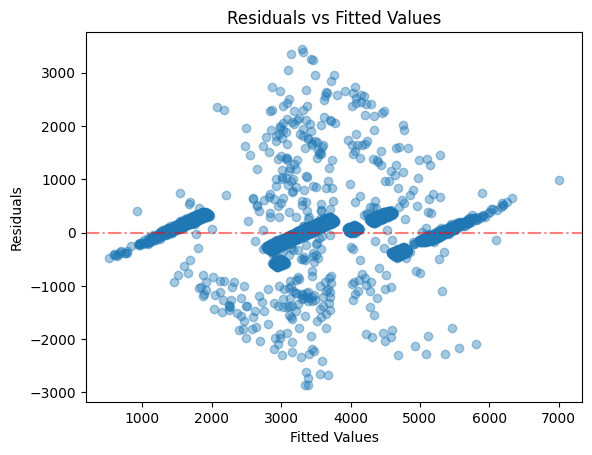

In [133]:
plt.scatter(model.fittedvalues, model.resid, alpha = 0.4)
plt.axhline(0, color = 'r', alpha = 0.5, linestyle = '-.')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# alpha = 0.4 defines some transparency in the
# data so we can see which areas are a little more dense in terms of datapoints.

Looks like the distribution of the variance vs the residual is rather symmetrics. we cannot say the variance of residual with respect to different target values are the same.

The linearity of the variables: We need to ensure that the target value/
dependent variable is linearly correlated with the features/independent variables.

We've already looked at distirbution of fitted values with respect to residuals in the scatterplot above. Given the scatterplot, we can say that linearity of variables is satisfied.

 So basically, just try to plot residual values with respect to fitted values and see if we spot any pattern. If it's completely like white noise (scattered), we're good togo. If the residuals show patterns like curves or funnels or clusters - this could be violation of linarity. Or unequal variance (violation of homoscedasticity).

In [134]:
# the result from this will be the f statistic as well as our
# p value stat (p value is what we're interested in)

import statsmodels.stats.api as sms

result = sms.het_goldfeldquandt(y_train, x_train)

In [135]:
result

(np.float64(0.9030018310575368), np.float64(0.9975938945640488), 'increasing')

The second value is the p-value, which is much much greater than 0.05% (our significance level).


In [136]:
result[1]

np.float64(0.9975938945640488)

Our pvalue is greated than 0.05 which we can say is our significance level.
So we can confidently say we won't reject the null hypothesis.

Now that we've checked the zero mean residual, homoscedasticity and linearity of variables (and know our model passes those criteria/tests), we have to check one other things in the trained linear regression model.

Normality of generated errors: We need to check whether the distribution of the error is normal or not.

<Axes: ylabel='Count'>

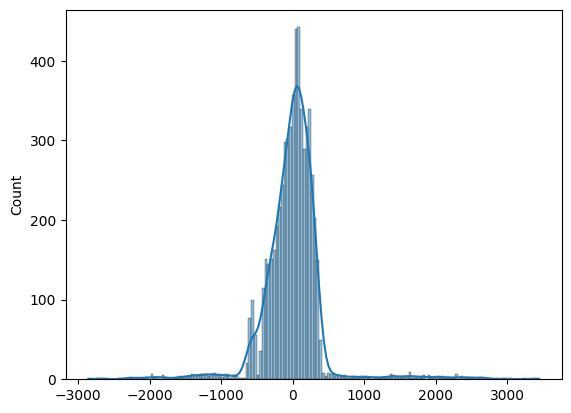

In [138]:
# normality of errors

sns.histplot(model.resid, kde = True)

Above looks simlar to a normal distribution.

Below we're going to compare distribution of residuals with a normal distribution, asking to what extent is this distribution close to normal (by comparing their quantile's values).

If the output is linear, a flatline, then we can say - the assumption of residual being normally distributed is well accepted.

We're going to use a stats library and do a probabilty plot and apply it to model.resid. And we're going to use pylab to plot these values.

((array([-3.68803911, -3.45585563, -3.3280438 , ...,  3.3280438 ,
          3.45585563,  3.68803911]),
  array([-2858.79890544, -2855.22538302, -2720.42581562, ...,
          3349.7209442 ,  3381.1126455 ,  3445.79253939])),
 (np.float64(395.06359610717965),
  np.float64(-2.165211765619922e-12),
  np.float64(0.8726675013810735)))

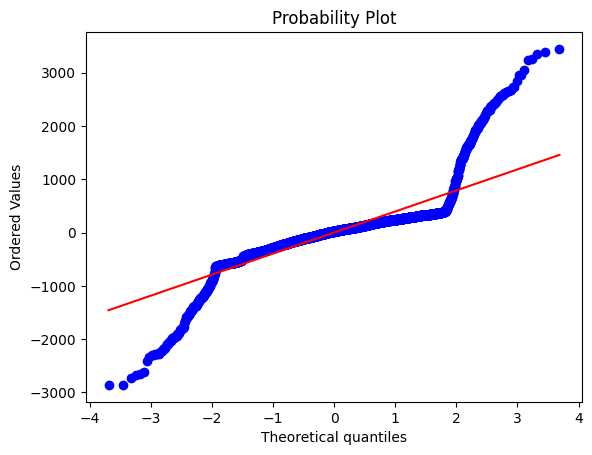

In [139]:
import pylab
from scipy import stats


stats.probplot(model.resid, dist = 'norm', plot = pylab)

It's almost a linear line. Confirms that our residual is very well normally distributed.

Linear Regression - Cross Validation.

Last question: If we split the training set another way, would we get the same level of r2 score or better as we got on this dataset or not?

We're not going to split the entire data set into different training and testing sets, but instead going to use the cross-validation score.

Cross validation function from scikit learn splits the dataset into a bunch of chunks. One for testing/evaluation and the rest for training. It also swaps chunks used for training as well, and calculates multiple errors and scores. It can use those scores to come up with an average level of error that we can ge and the standard deviation of the score or error that can be generated.

Cross validation score cannot be directly applied to statsmodels. We're going to use linear regression model from scikit learn for this purpose.

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [141]:
model2 = LinearRegression() # using all the default parameters for LinearRegression.

cross_val_score(model2, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')

array([-185567.58598085, -199170.71073646, -217550.34439917,
       -284289.82105727, -194585.5608098 , -168943.01235116,
       -168382.92477392, -245286.02977713, -235457.55545138,
       -158933.16448932])

The above provides us with 10 different values associated with mean squared error.

In [142]:
model2 = LinearRegression() # using all the default parameters for LinearRegression.

mape_ = cross_val_score(model2, x_train, y_train, cv = 10, scoring = 'neg_mean_absolute_percentage_error')

The above provides us with 10 different values associated with mean squared percentage error.

In [143]:
mape_

array([-0.10205739, -0.0968862 , -0.09544115, -0.10187953, -0.09523094,
       -0.13004823, -0.09182742, -0.09140841, -0.10461884, -0.09854409])

In [144]:
np.mean(mape_)

np.float64(-0.10079422025575153)

the mean value is ~10%

In [145]:
np.std(mape_)

np.float64(0.010590732978334398)

standard deviation is about ~1%

In [146]:
np.mean(-mape_) - 3 * np.std(mape_), np.mean(-mape_) + 3 * np.std(mape_)

(np.float64(0.06902202132074833), np.float64(0.13256641919075474))

99.7% of the time, the range of mape error will be in the above range of ~7% to ~13%. it's very rare for error to be outside of this range. Tt's what cross validation tells me.

In [147]:
cross_val_score(model2, x_test, y_test, cv = 10, scoring='neg_mean_absolute_percentage_error')

array([-0.08301149, -0.09088639, -0.10348655, -0.11166114, -0.08595078,
       -0.0865123 , -0.10222484, -0.11682692, -0.07638125, -0.09264912])

It doesn't necessarily make sense to run cross-validation on the test dataset given the model is not trained on the test dataset. But still the mean value of those results is close to ~10% as seen below.

In [148]:
np.mean(cross_val_score(model2, x_test, y_test, cv = 10, scoring='neg_mean_absolute_percentage_error'))

np.float64(-0.09495907825148894)

In [149]:
np.std(cross_val_score(model2, x_test, y_test, cv = 10, scoring='neg_mean_absolute_percentage_error'))

np.float64(0.01242968744180233)

**Summary Overview: **

We were given a structured dataset (in the form of a table). Not in the form of images, texts, audios or videos - which would be considered unstructured dataset.

This structured dataset had multiple columns. One of the columns was the target variable. We wanted to predict that. The target value was a continuous variable - not discrete or categorical.

This problem became a supervised regression problem.

Question we then needed to answer - would a linear regression work here or do we require non-linear regression? Or perform some sort of non-linearities on the feature extraction so we can apply a regression on that?

First we developed a model. Then checked linear regression criteria, such as computing residuals under training dataset. Seeing if the mean values were 0 or not. We checked homoscedasticity associated with the distribution of residuals. We checked linearity of variables with respect to targets. We checked normality of the errors. Distribution of the residuals. Checking if it's a normal gaussian distribution or not.

When our model passed the above criteria, we could say this linear regression model we developed is good enough and we can succeed at developing a prediction model to basically predict the target value.

Before getting to model development, we conducted exploratory data analysis to check correlation between the features themselves and between the features and the target values. We did this to understand whether we expect to have a model that can really predict the target variable - if we see correlation between dependent and independent variables.

We learned some key insights from the dataset as well (see below).

**Actionable Insights and Business Recommendations**

We can use this prediction model to predict the total sales that will be done by SuperKart in the next quarter.

The model explains around 79% of the variation in the data.

* OUT004 – OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. SuperKart can look to increase the size of this store from medium to high. They can also look to set up stores in this city of having comparable socio-economic conditions in order to expand their business and reach.

* OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. SuperKart can look to upgrade its size or target similar cities for business expansion.

* OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing up to the mark. SuperKart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more customers.

* OUT003 – Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be targetted.

* Daily needs like fruits and vegetables and snack foods are the biggest contributors to the revenue across all the stores. So SuperKart should look to maintain the inventory of these products properly and ensure that these products never face a shortage.

**Additional information that can be collected to gain better insights**

Customers’ details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies according to that.

The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their inventory accordingly.


This was a supervised linear regression exercise.

In [155]:
!jupyter nbconvert --to html "/content/drive/MyDrive/career change (Sept 2023-2025)/computer & data science/MIT Applied Data Science Course/Course Notes & Presentations/Introduction to Supervised Learning: Regression/Machine Learning Guided Project/superkart_ml.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/career change (Sept 2023-2025)/computer & data science/MIT Applied Data Science Course/Course Notes & Presentations/Introduction to Supervised Learning: Regression/Machine Learning Guided Project/superkart_ml.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 39 image(s).
[NbConvertApp] Writing 2449791 bytes to /content/drive/MyDrive/career change (Sept 2023-2025)/computer & data science/MIT Applied Data Science Course/Course Notes & Presentations/Introduction to Supervised Learning: Regression/Machine Learning Guided Project/superkart_ml.html


In [159]:
!ls "/content/drive/MyDrive/career change (Sept 2023-2025)/computer & data science/MIT Applied Data Science Course/Course Notes & Presentations/Introduction to Supervised Learning: Regression/Machine Learning Guided Project/"


'ML Project Notes.gdoc'   SuperKart.csv   superkart_ml.ipynb


In [160]:
%cd "/content/drive/MyDrive/career change (Sept 2023-2025)/computer & data science/MIT Applied Data Science Course/Course Notes & Presentations/Introduction to Supervised Learning: Regression/Machine Learning Guided Project/"
!jupyter nbconvert --to html superkart_ml.ipynb


/content/drive/MyDrive/career change (Sept 2023-2025)/computer & data science/MIT Applied Data Science Course/Course Notes & Presentations/Introduction to Supervised Learning: Regression/Machine Learning Guided Project
[NbConvertApp] Converting notebook superkart_ml.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 39 image(s).
[NbConvertApp] Writing 2450449 bytes to superkart_ml.html


In [161]:
from google.colab import files
files.download("superkart_ml.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>